# Исследовательский анализ продажи игр

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Цели исследования
    1. Выявить закономерности, определяющие успешность игр;
    2. Отработать принцип работы с данными;
    
#### Ход исследования
        Получим данные из датасета '/datasets/games.csv'. О качестве данных нет никакой информации. Поэтому перед анализом нужно просмотреть данные. 
        Данные будут оценены на наличие ошибок и оценено возможное влияние этих ошибок на дальнейший анализ. На этапе предобработки попытаюсь исправить ошибки там где возможно.
    
        Таким образом ход работы будет выглядить следующим образом:
        - обзор данных;
        - предобработка данных;
        - добавление столбцов с необходимыми данными;
        - анализ выпуска игр по годам;
        - анализ выпуска игр для разных платформ;
        - анализ влияния оценок критиков и пользователей;
        - анализ игр по жанрам;
        - составим портрет пользователя каждого региона и определим для него топ-5 платформ и жанров, а так же оценим влияние ESRB  
          на продажи в отдельном регионе;
        - проверим гипотезу, что рейтинги платформ Xbox One и PC одинаковые;
        - проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ.
          «спортивные соревнования») разные;
       

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv',  sep=',')
except:
    df = pd.read_csv('games.csv', sep=',')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовьте данные

#### Приведем названия столбцов к нижнему регистру

In [5]:
df.columns = map(str.lower, df.columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Приведем данные к нужному типу данных

name, platform - оставлем object\
year_of_release - приведем к формату даты для возможности дальнейшего анализа\
genre - оставляем object\
na_sales, eu_sales, jp_sales, other_sales, critic_score - оставляем как есть\
user_score - приводим к float64\
rating - оставляем как есть

#### Обработаем пропуски

Видим пропуски в столбце с годом релиза. Их меньше 5% поэтому можно их сразу удалить. Но в начале проверим какие продажи былии у игр с пропусками в годах релиза

In [7]:
null = df.loc[df['year_of_release'].isnull()]

In [9]:
print('Продажи в Северной Америке:', null['na_sales'].sum())
print('Продажи в Европе:', null['eu_sales'].sum())
print('Продажи в Японии:', null['jp_sales'].sum())

Продажи в Северной Америке: 59.15
Продажи в Европе: 24.46
Продажи в Японии: 6.699999999999999


Видим, что у данных игр и продажи достаточно низкие. Удаление их не должно повлиять на дальнейшее исследование

In [10]:
df = df.dropna(subset=['year_of_release'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [13]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Так же видим пропуски в столбцах с названием и жанорм. Их всего по 2 и есть ощущение, что это одни и те же игры. Тоже удалим

In [15]:
df = df.dropna(subset=['name'])

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Пропуски остались только в столбцах с оценками. Предположим, что у этих игр просто нет оценок. Заменим пропуски значением "0". Применим для этого цикл

Сначала проверим что в исходном датасете нет нулевых значений.

In [18]:
df.query('critic_score == 0 or user_score == 0 or rating == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [26]:
columns_null = ['critic_score', 'user_score', 'rating']
for index in columns_null:
    df[index] = df[index].fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Проанализируем столбец с оценкой пользователей. Там есть значение tbd. Это понятие обозначает, что рейтинг еще не определен. Так же заменим значения на 0 и приведем столбец к типу float64.

In [28]:
import warnings
warnings.simplefilter("ignore")

In [29]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [30]:
df['user_score'] = df['user_score'].astype('float64')

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец

In [31]:
df['sales_total'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [32]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,0.01


In [33]:
df['critic_score'] = df['critic_score'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Перед поиском дупликатов приведем все категориальные данные к нижнему регистру

In [35]:
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()
df['platform'] = df['platform'].str.lower()

In [36]:
df.loc[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15969,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


Нашли две строки с неполными дубликатами. Посмотрим игры с таким названием, чтобы понять какой из них правильнее удалить

In [37]:
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
503,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,E,2.85
600,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E,2.56
3933,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,0,7.3,E,0.50
5800,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63,7.3,E,0.30
6956,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75,6.7,E,0.23
15969,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E,0.01


Видим, что для PS3 есть две игры, но во втором случае продажи 0.01. Эту строку удаляем

In [38]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release'], keep='first')

Еще раз проверим на дубликаты

In [39]:
df.loc[df.duplicated(['name', 'platform', 'year_of_release'])].sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
sales_total        0.0
dtype: float64

Дубликатов нет

### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрим продажу игр по годам

In [40]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [41]:
count = df['name'].count()

In [45]:
plt.style.use('fivethirtyeight')

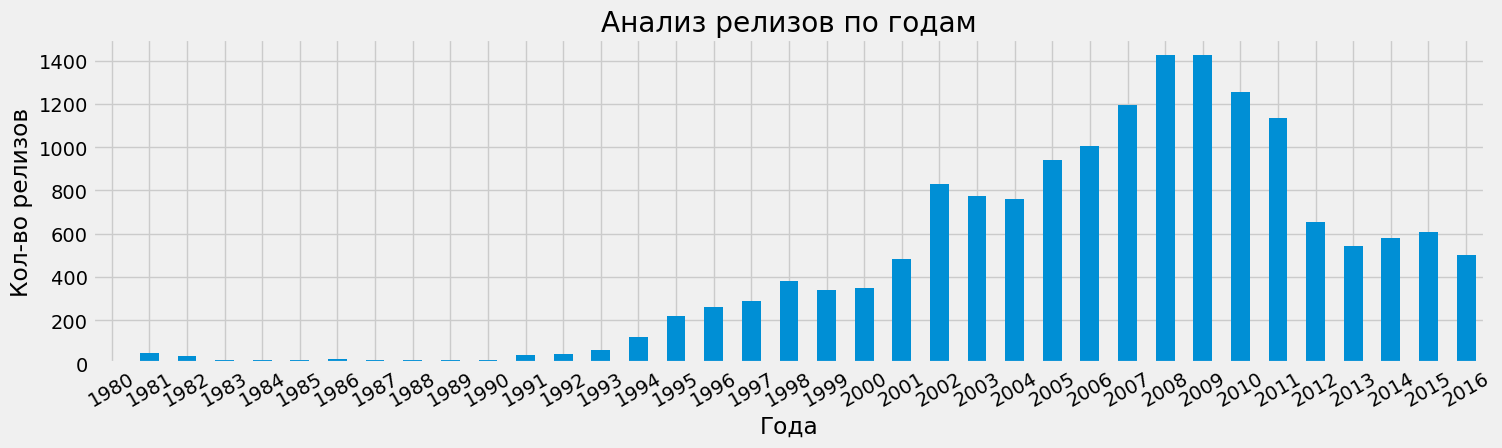

In [46]:
df.groupby('year_of_release')['name'].agg('count').plot(
            kind='bar',
            rot=30,
            title='Анализ релизов по годам',
            xlabel='Года',
            ylabel='Кол-во релизов',
            figsize=(16,4),
            fontsize=14);

Исходя из диаграммы, что с 1980 по 1995 год кол-во игр достаточно малое. Основной массив данных начинается с 1995 года. В 2012-2015 годах видим падение кол-ва игр до уровня начала двухтысячных. Посмотрим ближе игры до 1995 года.

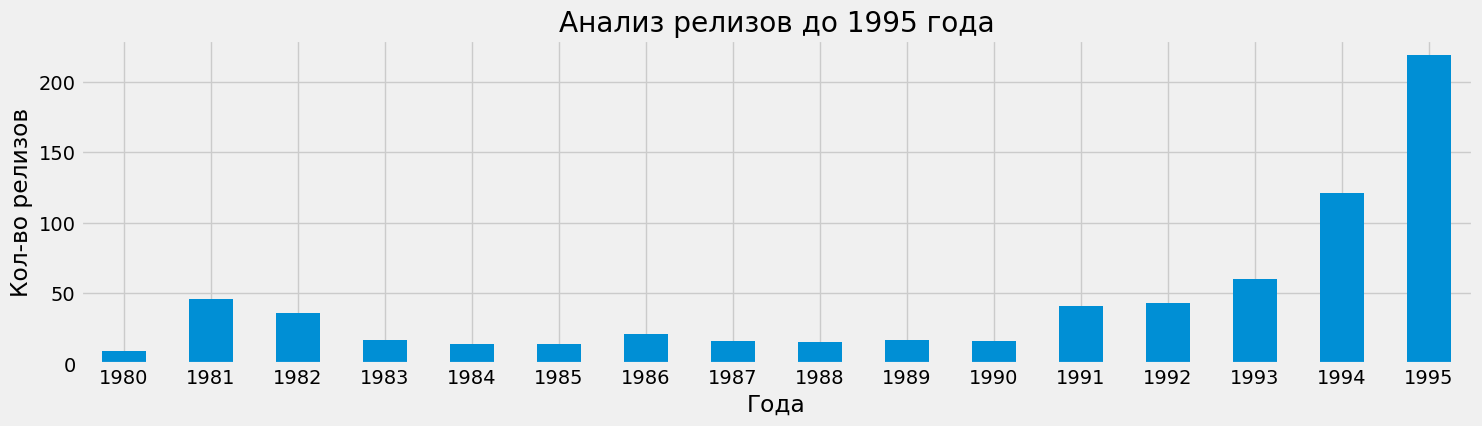

In [47]:
before_1995 = df.query('year_of_release <= 1995')
before_1995.groupby('year_of_release')['name'].agg('count').plot(
            kind='bar',
            rot=0,
            title='Анализ релизов до 1995 года',
            xlabel='Года',
            ylabel='Кол-во релизов',
            figsize=(16,4),
            fontsize=14);

In [48]:
df.query('year_of_release < 1991')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,0,0.0,0,30.26
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,0,0.0,0,28.31
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,0,0.0,0,20.62
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,0,0.0,0,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
11596,super baseball,2600,1987,sports,0.07,0.00,0.00,0.00,0,0.0,0,0.07
12468,adventures of lolo,nes,1989,puzzle,0.06,0.00,0.00,0.00,0,0.0,0,0.06
14241,alter ego,pc,1985,simulation,0.00,0.03,0.00,0.01,59,5.8,T,0.04
14390,simcity,pc,1988,simulation,0.00,0.02,0.00,0.01,64,2.2,E10+,0.03


Данных до 91 года мало поэтому можем их не учитывать при дальнейшем анализе.

In [49]:
df = df.query('year_of_release >= 1991')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16222 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16222 non-null  object 
 1   platform         16222 non-null  object 
 2   year_of_release  16222 non-null  int64  
 3   genre            16222 non-null  object 
 4   na_sales         16222 non-null  float64
 5   eu_sales         16222 non-null  float64
 6   jp_sales         16222 non-null  float64
 7   other_sales      16222 non-null  float64
 8   critic_score     16222 non-null  int64  
 9   user_score       16222 non-null  float64
 10  rating           16222 non-null  object 
 11  sales_total      16222 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


#### Посмотрим как менялись продажи по платформам

In [51]:
df_pivot = df.groupby('platform').agg({'sales_total':'sum'}).sort_values('sales_total', ascending=False).head(10)

Посмотрим на Топ-10 платформ по продажам

In [52]:
df_pivot

,sales_total
platform,
ps2,1233.56
x360,961.24
ps3,931.33
wii,891.18
ds,802.76
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


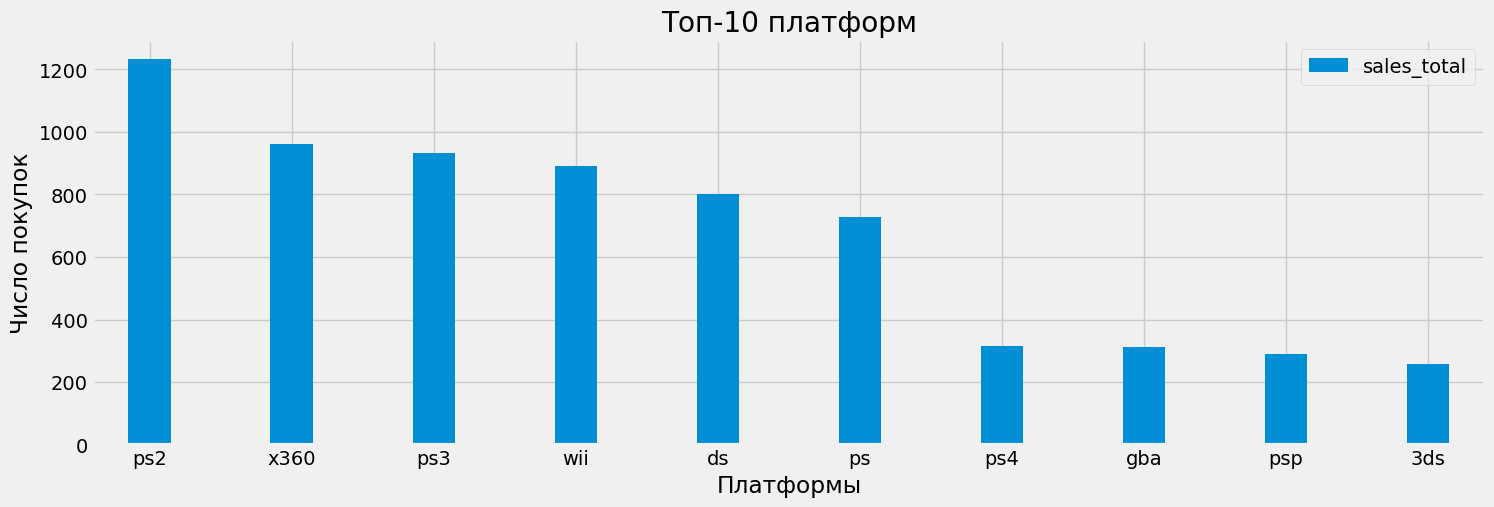

In [53]:
df_pivot.plot(kind='bar', 
              rot=0,
              title ='Топ-10 платформ',
              legend='Число продаж',
              xlabel='Платформы',
              ylabel='Число покупок',
              figsize=(16,5),
              fontsize=14,
              width=0.3);

In [54]:
def pl_df(plat1, plat2):
    plat1 = df.query(f'platform == "{plat2}"')
    plat1.groupby('year_of_release')['name'].agg('count').plot(
            kind='bar',
            rot=0,
            title=f'Анализ релизов для платформы {plat2} по годам',
            xlabel='Года',
            ylabel='Кол-во релизов',
            figsize=(16,5),
            fontsize=14,
            width=0.3);

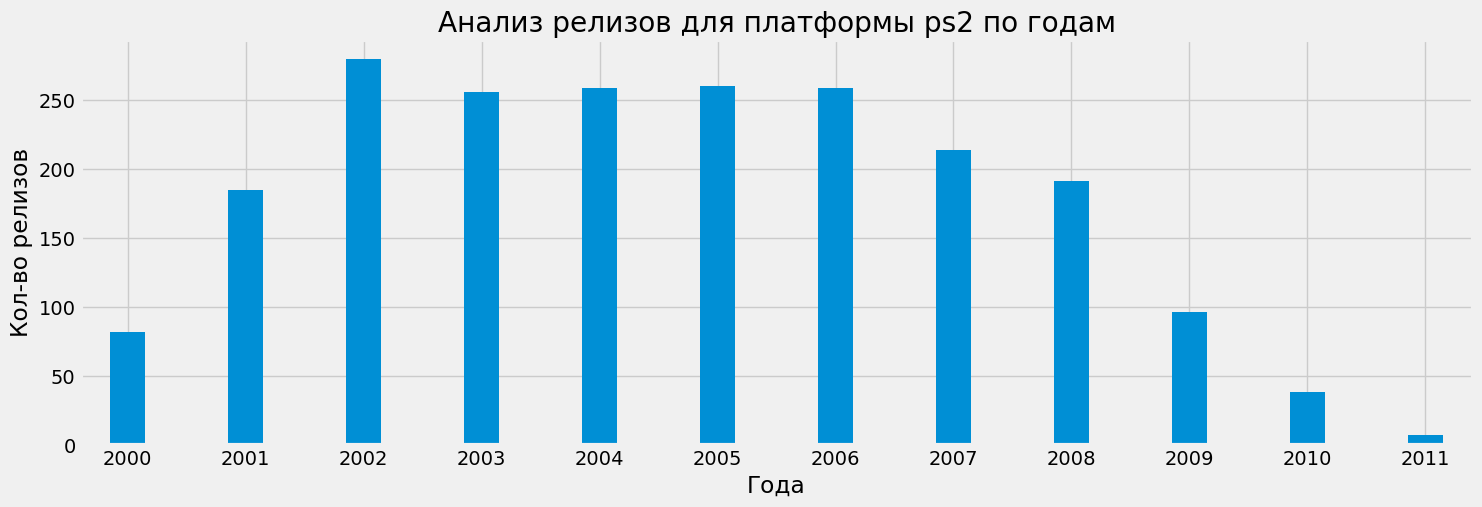

In [55]:
pl_df('ps2', "ps2")

Видим, что продажи игра для PS2 начались с 2000 года. Самый высокий период продаж пришелся на 2002 года. В общем период наибольшего использования данной платформы приходится на период с 2000 до 2006. После этого продажи начали снижаться. Последние продажи приходятся на 2011 год

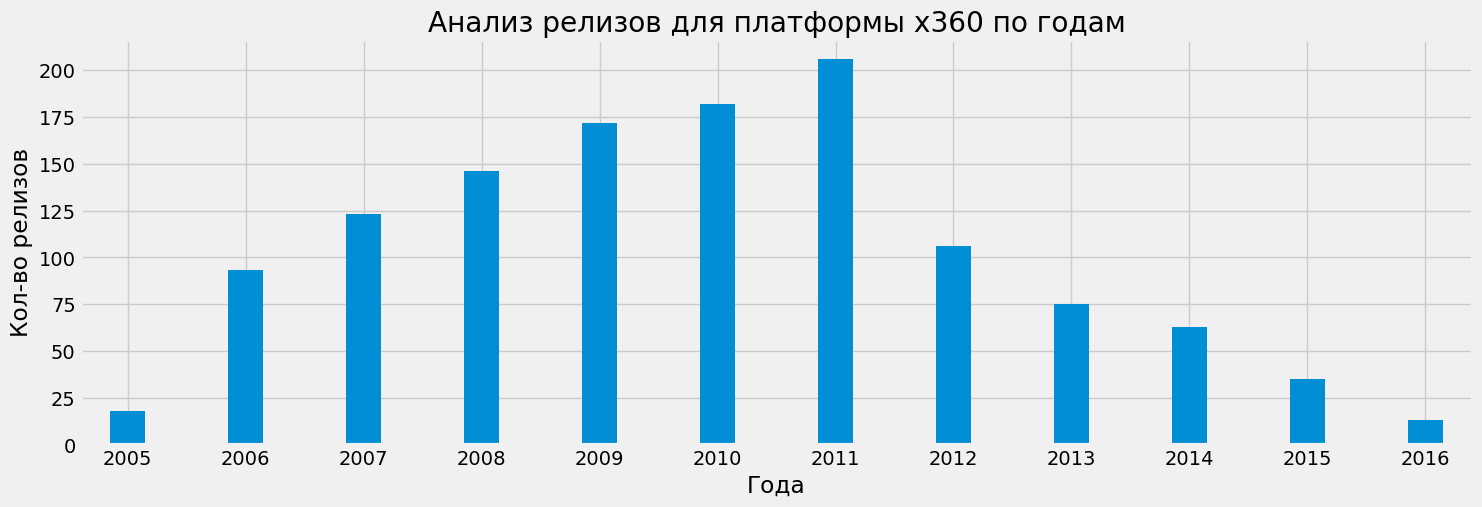

In [56]:
pl_df('x360', "x360")

Х360 - продажи начались в 2005 году. После этого наблюдается рост кол-ва игра на протяжении 6 лет. Пик приходится на 2011 год. Затем продажи упали практически в 2 раза. После этого наблюдается дальнейшее падение. Последние данные за 2016 год. Кол-во очень мало.

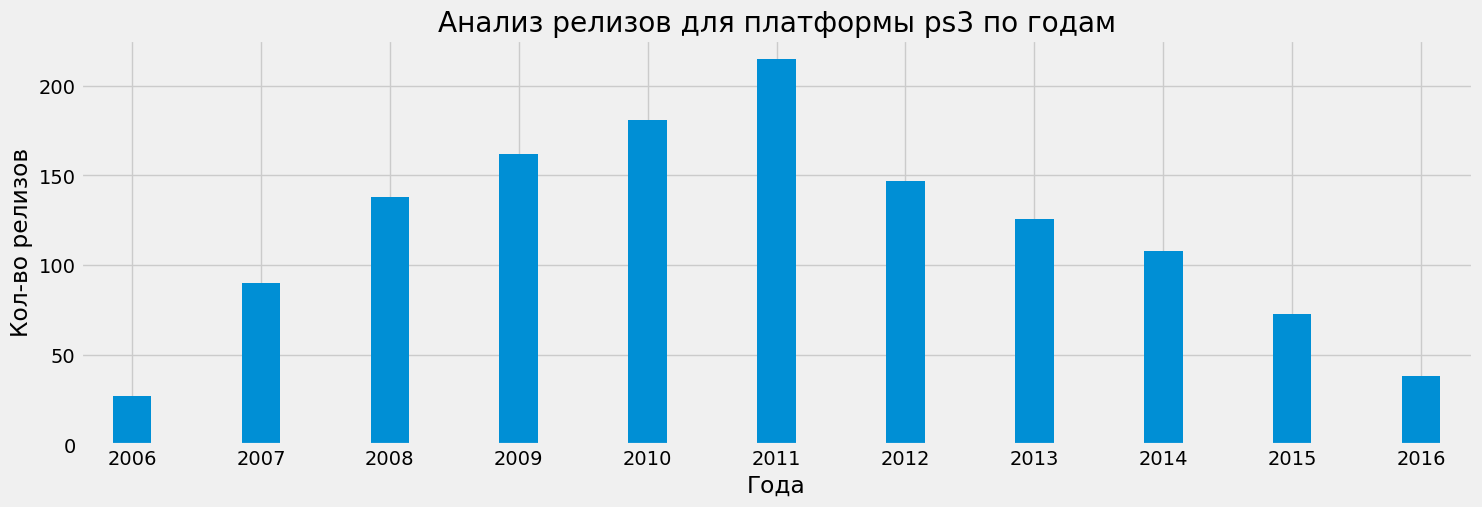

In [57]:
pl_df('ps3', "ps3")

PS3 - выход первых игр приходится на 2006 год. В целом картина почти полностью повторяет Х360. В течении первых 5 лет наблюдаем подъем. Пик приходится на 2011 год. В 2012 году спад, но не такой большой как наблюдался у Х360. Далее спад продолжается до 2016 года. Но в целом показатели выше чем у X360. Посмотрим на эти две платформы на сводной диаграмме 

In [58]:
x360_ps3 = df.query('platform == "ps3" | platform == "x360"')

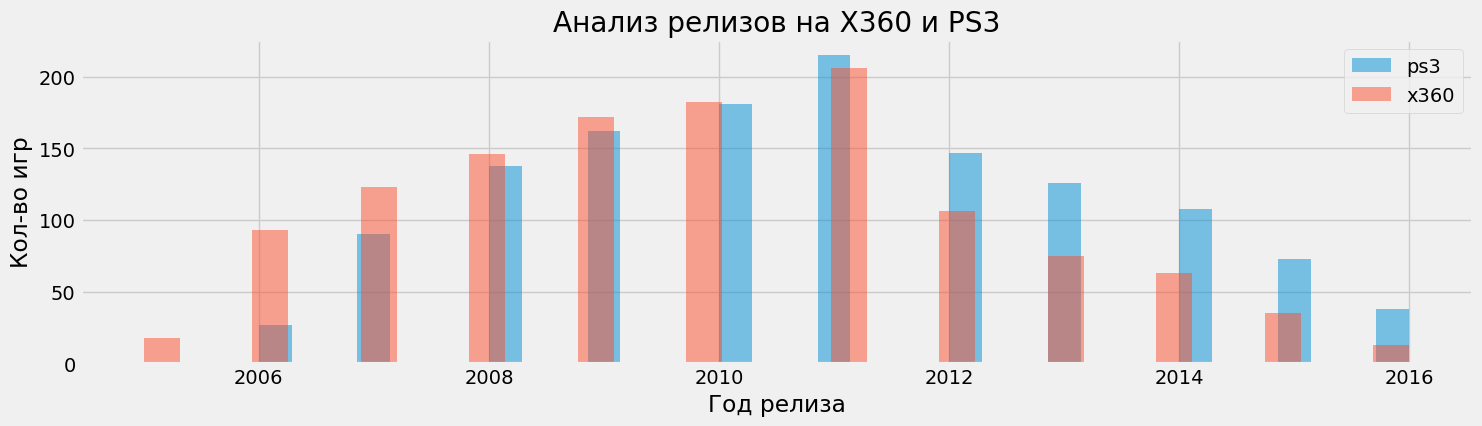

In [59]:
x360_ps3.groupby('platform')['year_of_release'].plot(kind='hist', bins=35, alpha=0.5, figsize=(16,4), fontsize=14)
plt.legend(['ps3', 'x360'])
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.title('Анализ релизов на X360 и PS3')
plt.show()

Видим, что продажи действительно очень схожи. При этом, если до 2010 года продажи были выше у Х360, в 2010 они сравнялись с PS2 и затем наблюдается обоюдное падение, но при этом продажи у PS3 выше.

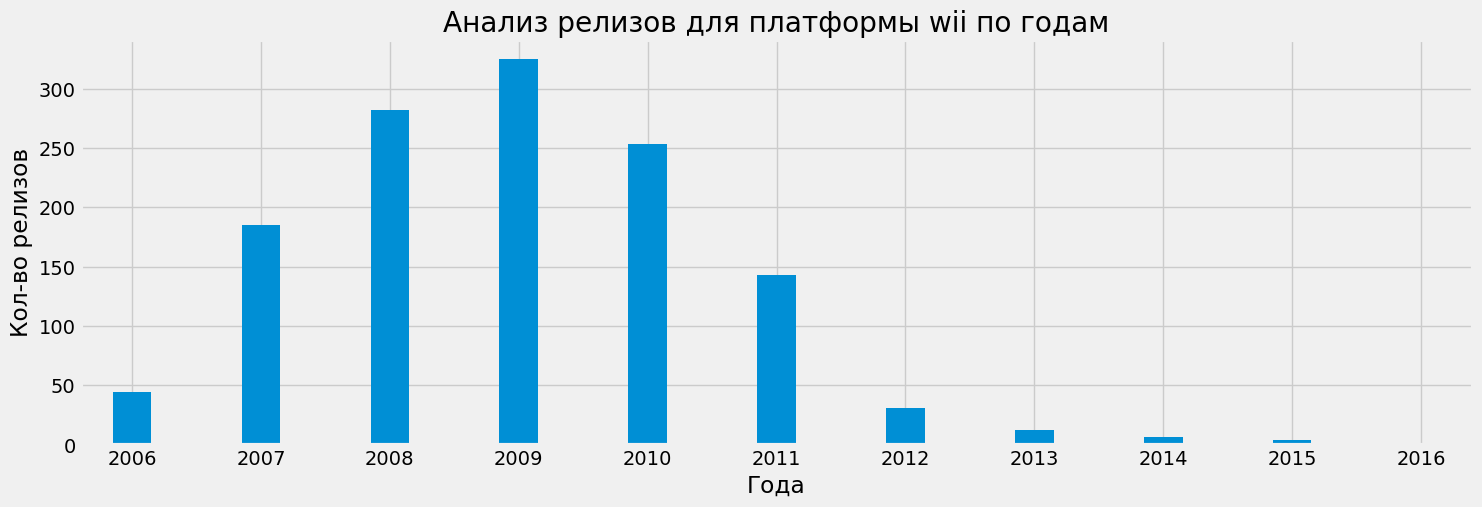

In [60]:
pl_df('wii', "wii")

Начало продаж так же приходится на 2006 год. Далее резкий подъем до более чем 300 игр за 3 года. Пик приходится на 2009 год и он выше чем пики для Х360 и PS3. После этого началось снижение продаж и с 2013 игры на данной платформе практически не выходят.

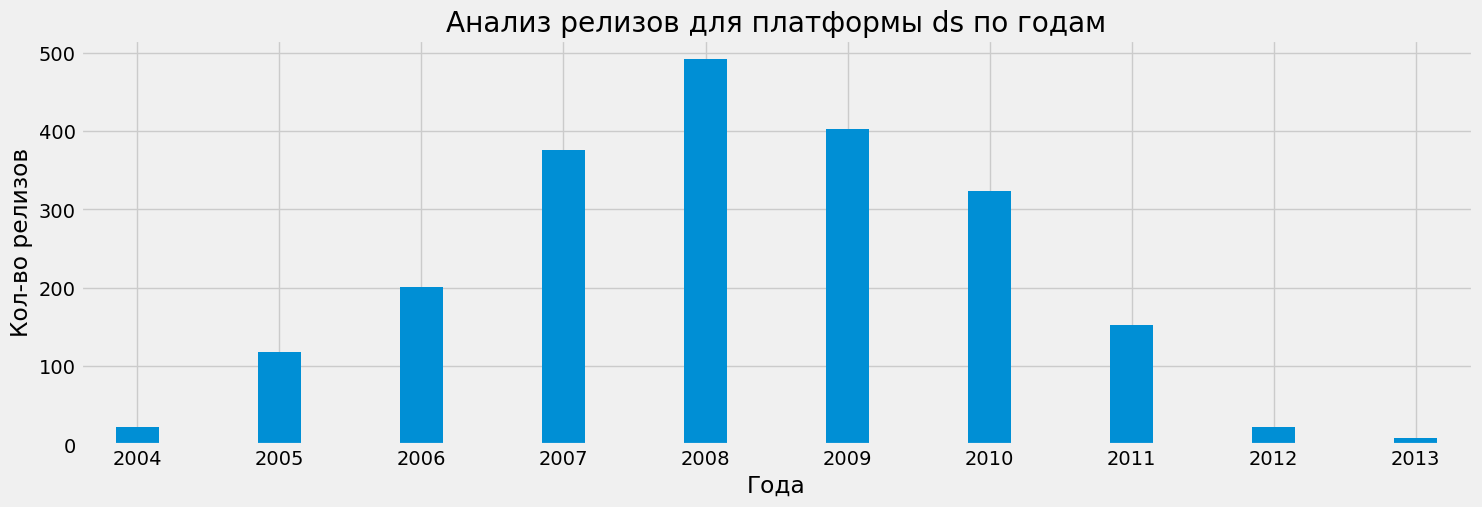

In [61]:
pl_df('ds', "ds")

DS - начало продаж наблюдается с 2004 года. За 4 года произошел рост и пик продаж пришелся на 2008 год. Было выпущено почти 500 игр, что значительно выше всех предыдущих платформ.

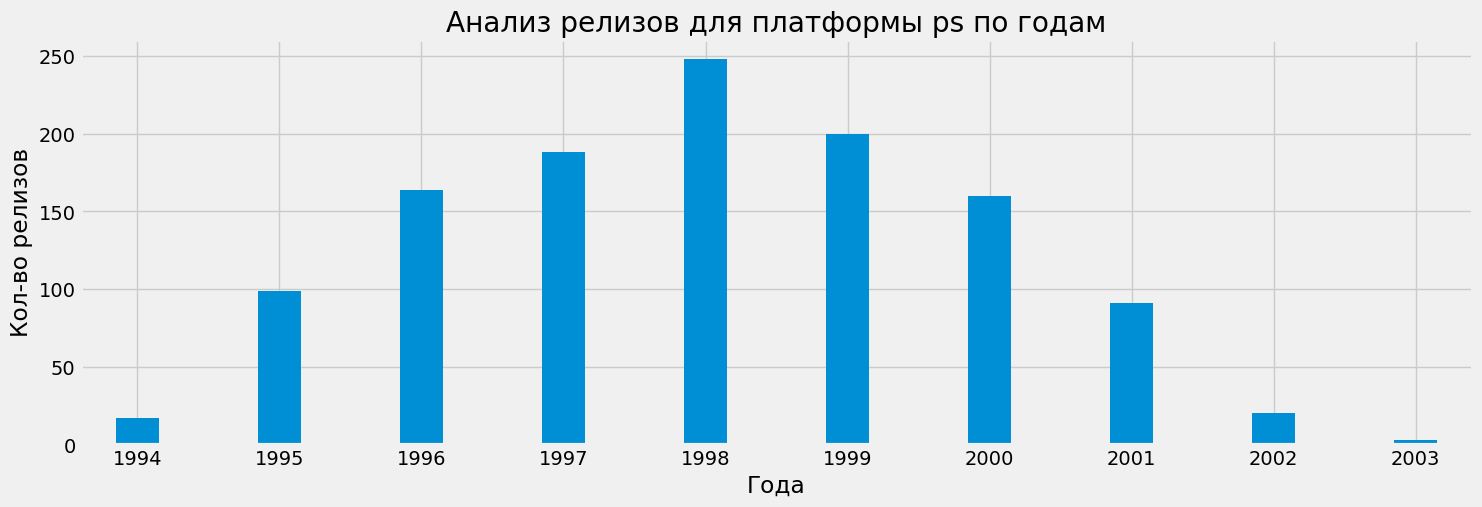

In [62]:
pl_df('ps', "ps")

PS - первые релизы вышли в 1994. За 4 года произошел рост и пик пришелся на 1998 год. После этого падение и последние релизы были в 2003 году.

Начиная с 7 места в нашем топ-10 наблюдаем значительное падение кол-ва релизов. Посмотрим что могло к этому привести.

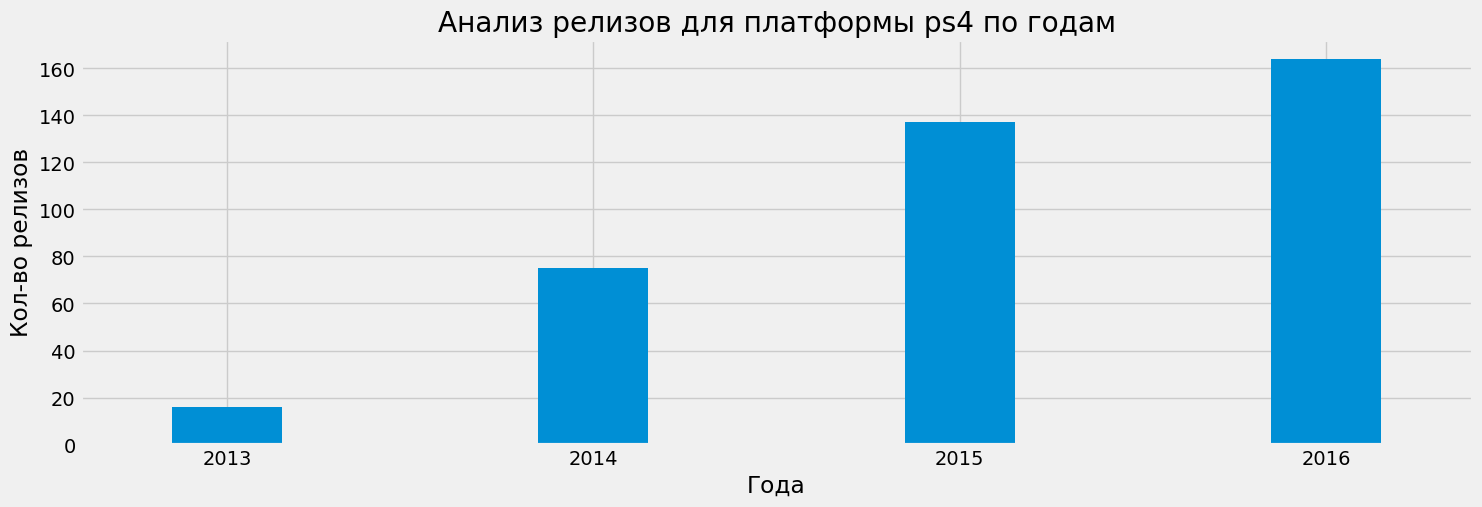

In [63]:
pl_df('ps4', "ps4")

Видим, что первый релиз был в 2013 году. Если сейчас 2016 год, то прошло всего три года. Основываясь на анализе предыдущих платформ, где пик приходился на 4 год, мы можем сделать вывод, что пик еще не достигнут. Большой отрыв по кол-ву игр от топ-6 обусловлен тем, что платформа молодая поэтому релизов мало.

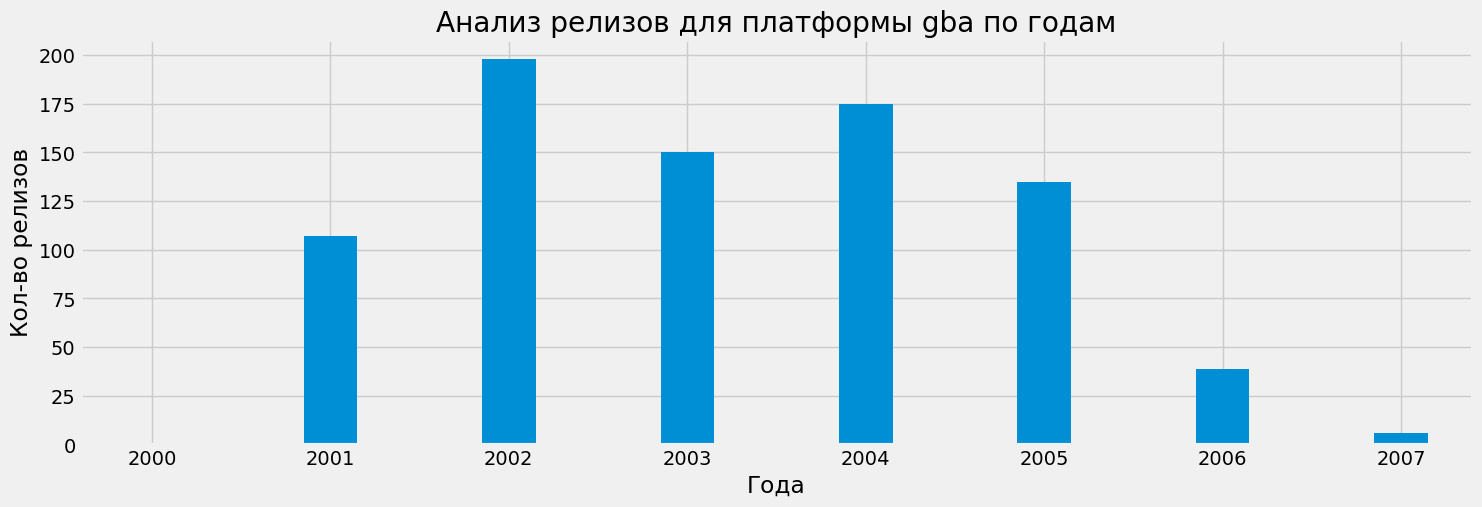

In [64]:
pl_df('gba', "gba")

GBA - первый релиз пришелся на 2000. Пика достигла за 2 года. После этого началось снижение и в 2007 году был последний релиз.

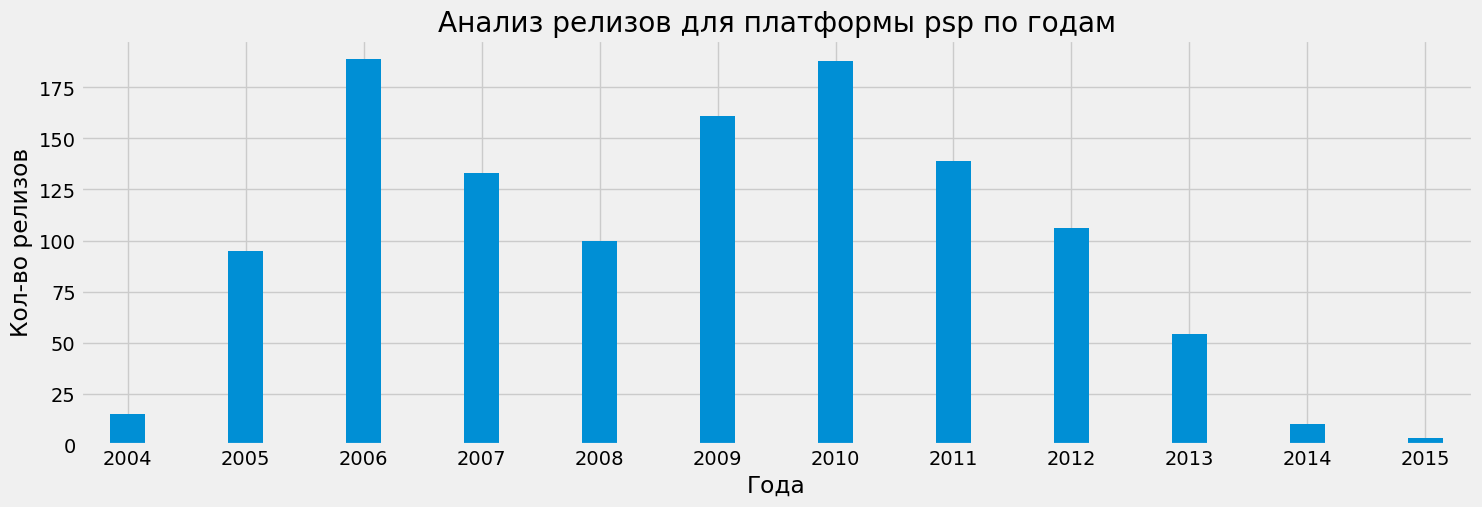

In [65]:
pl_df('psp', "psp")

PSP - первый релиз - 2004 год. В отличии от предыдущих платформ наблюдаем два пика: 1 в 2006 (через 2 года после релиза), 2 в 2010 (через 6 лет). Затем спад и последний релиз в 2015 году.

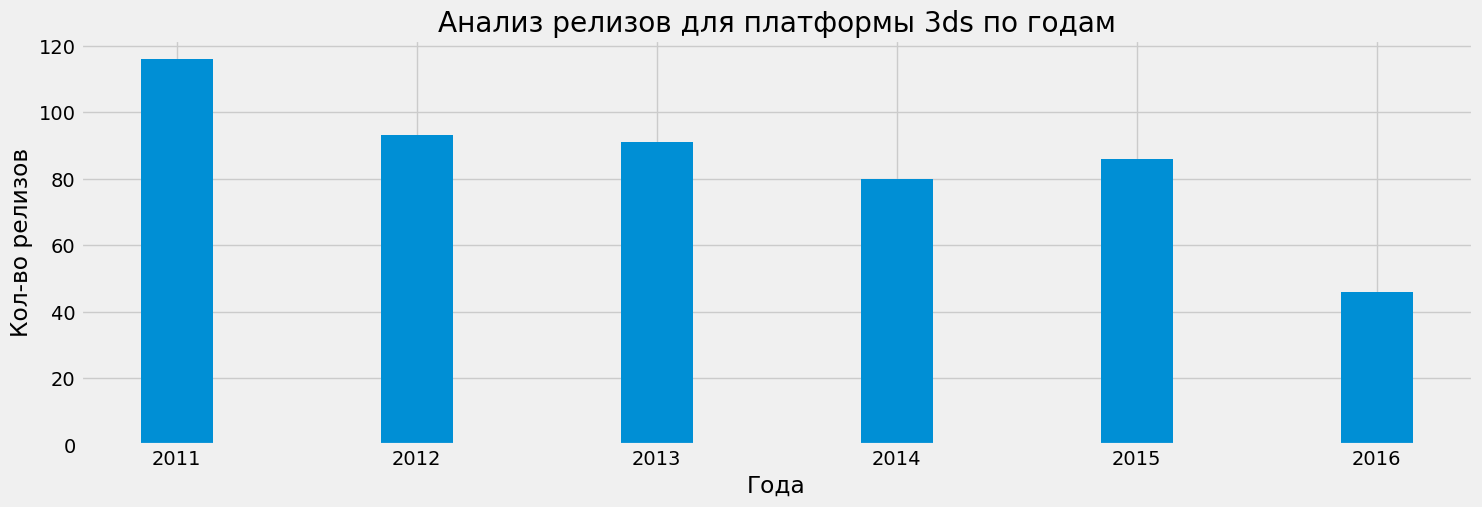

In [66]:
pl_df('ds3', "3ds")

3DS - первый релиз - 2011 год. Сразу бросается в глаза распределение очень отличающееся от остальных платформ. Сразу после выхода платформа достигла своего пика (на момент анализа). Но, кол-во игр на общем фоне очень низко. В течении 5 лет от релиза наблюдается тенденция к снижению.

Посмотрим с какой частотой появляются новые платформы и как долго они держаться на рынке

PS - 1994 - 2003 г.\
GBA - 2000 - 2007 г.\
PS2 - 2000 - 2011 г.\
DS - 2004 - 2013 г.\
PSP - 2004 - 2015 г.\
X360 - 2005 - 2016 г.\
PS3 - 2006 - 2016 г.\
Wii - 2006 - 2016 г.\
3DS - 2011 - 2016 г.\
PS4 - 2013 - 2016 г.

Видим, что новые платформы появляются примерно каждые 4-6 лет. Существуют они примерно 7-11 лет и пик приходится на 4-5 год.

Для дальнейшего анализа возьмем да последние 3 года. Этого должно хватить, чтобы понять на каком этапе развития находится платформа

In [67]:
pa = df.query('year_of_release > 2013')

In [68]:
pa_pivot = pa.groupby('platform').agg({'sales_total':'sum'}).sort_values('sales_total', ascending=False)

In [69]:
pa_pivot['first_release'] = df.groupby('platform')['year_of_release'].min()

In [70]:
pa_pivot

,sales_total,first_release
platform,,
ps4,288.15,2013
xone,140.36,2013
3ds,86.68,2011
ps3,68.18,2006
x360,48.22,2005
wiiu,42.98,2012
pc,27.05,1992
psv,22.40,2011
wii,5.07,2006


Видим 5 платформ, которые лидируют по продажам за актуальный период. Лидирующие места у платформ выпущенных в 2013 году, то есть пик ими еще в теории не достигнут и должен прийтись на 2017 год. Платформа 3DS стартовала со своей деятельностью в 2011. То есть пик ею уже должен был быть пройден, но до полного угасания есть еще время. PS3 и X360 были выпущены в 2006 и 2005 годах значит сейчас эти две платформы находятся на этапе падения релизов. Вероятно, что 2016 был одним из последних годов, когда на них выпускали игры. Рассмотрим динамику по каждой платформе.

In [71]:
def bar(pl1, pl2):
    pl1 = pa.query(f'platform == "{pl2}"')
    pl1.groupby('year_of_release')['name'].agg('count').plot(
            kind='bar',
            rot=0,
            title=f'Анализ релизов на {pl2} за актуальный период',
            xlabel='Года',
            ylabel='Кол-во релизов',
            figsize=(16,5),
            fontsize=14,
            width=0.05);

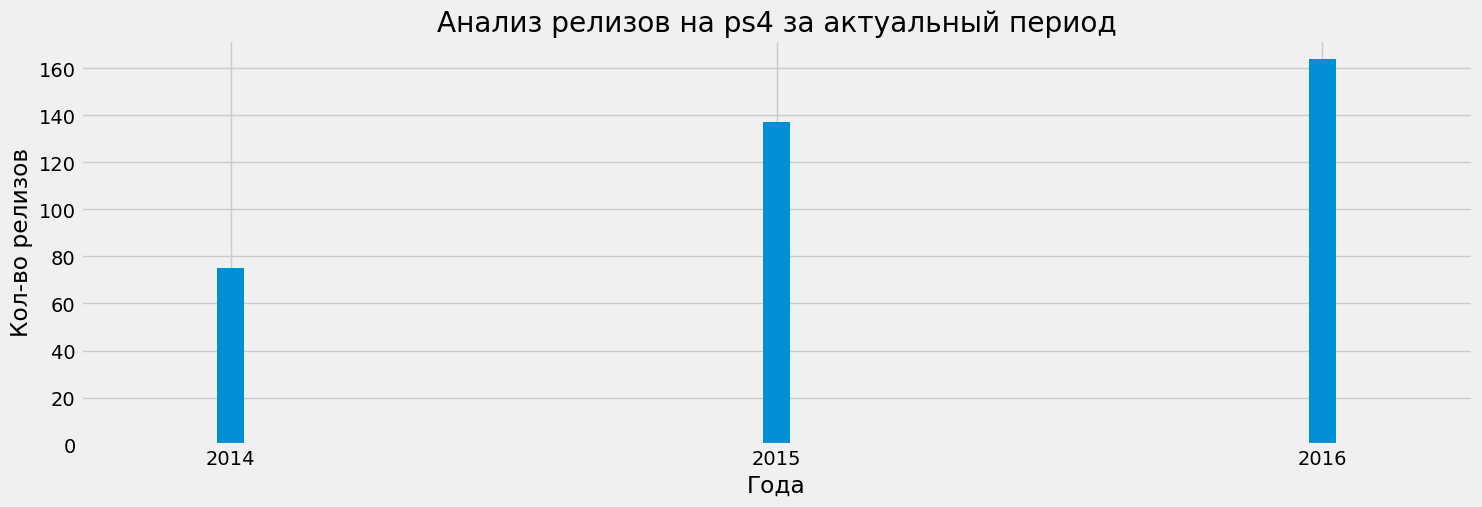

In [72]:
bar('ps4_pa', 'ps4')

Первый релиз в 2013, платформа молодая, перспективная. Пик прогнозируется на 2017 год.

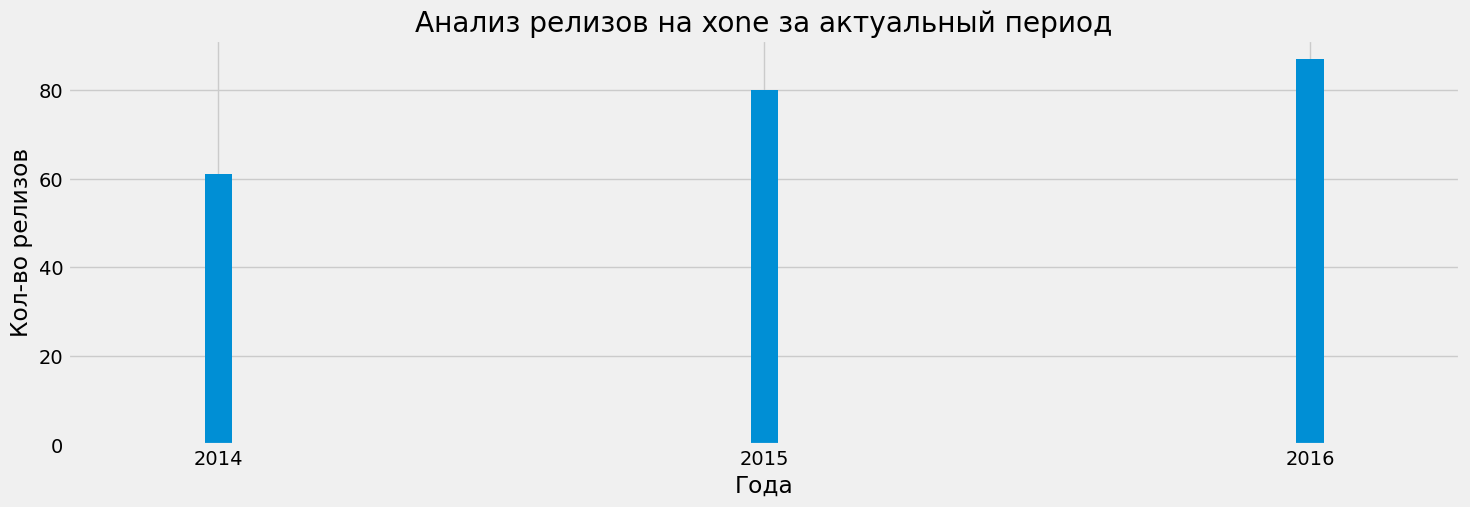

In [73]:
bar('xone_pa', 'xone')

Платформа, которая не была ранее проанализирована. Появилась она в 2013 году, то есть в теории пик ею еще не пройден и может прийтись на 2017 год. Сейчас популсярность платформы находится в состоянии роста.

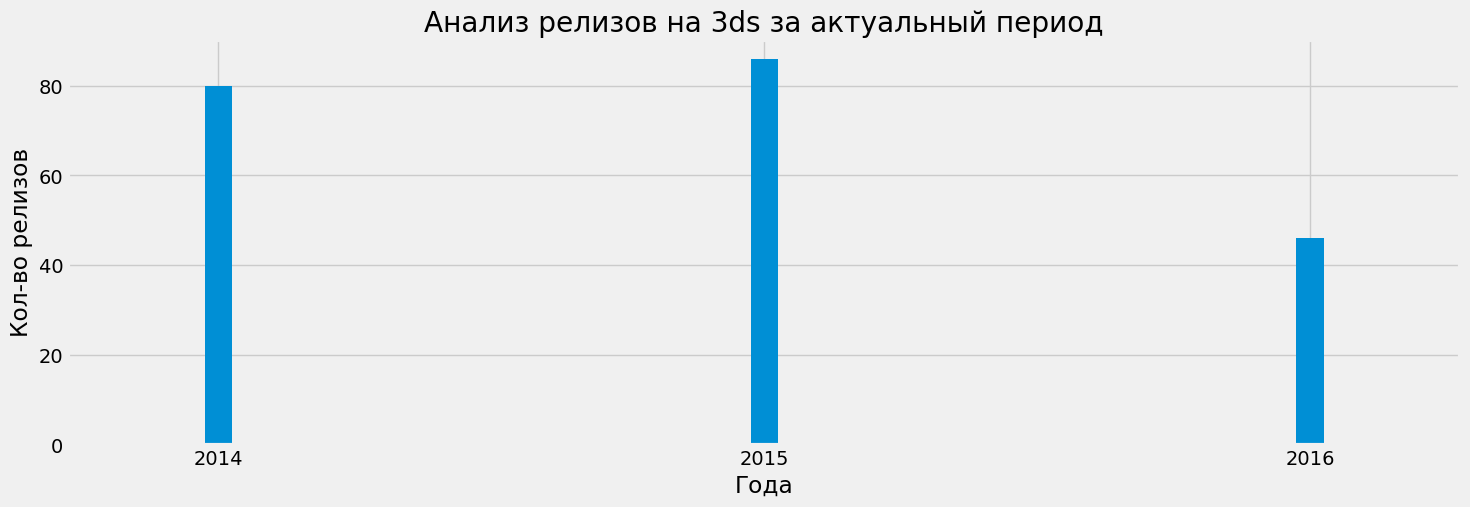

In [74]:
bar('ds3_na', '3ds')

Данная платформа имеет нетипичное по сравнению с другими распределение активности по годам, но в любом случае наблюдаем тенденцию к спаду.

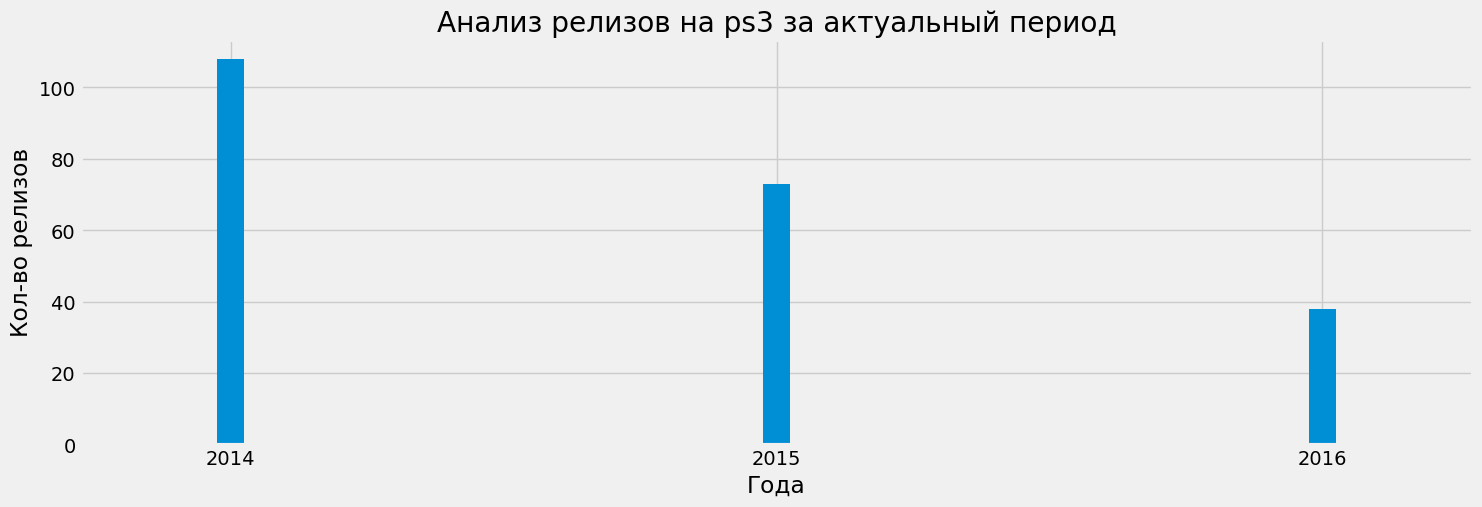

In [75]:
bar('ps3_pa', 'ps3')

Ожидаемо PS3 уже не популярна. Рассчитывать на нее в 2017 году не стоит

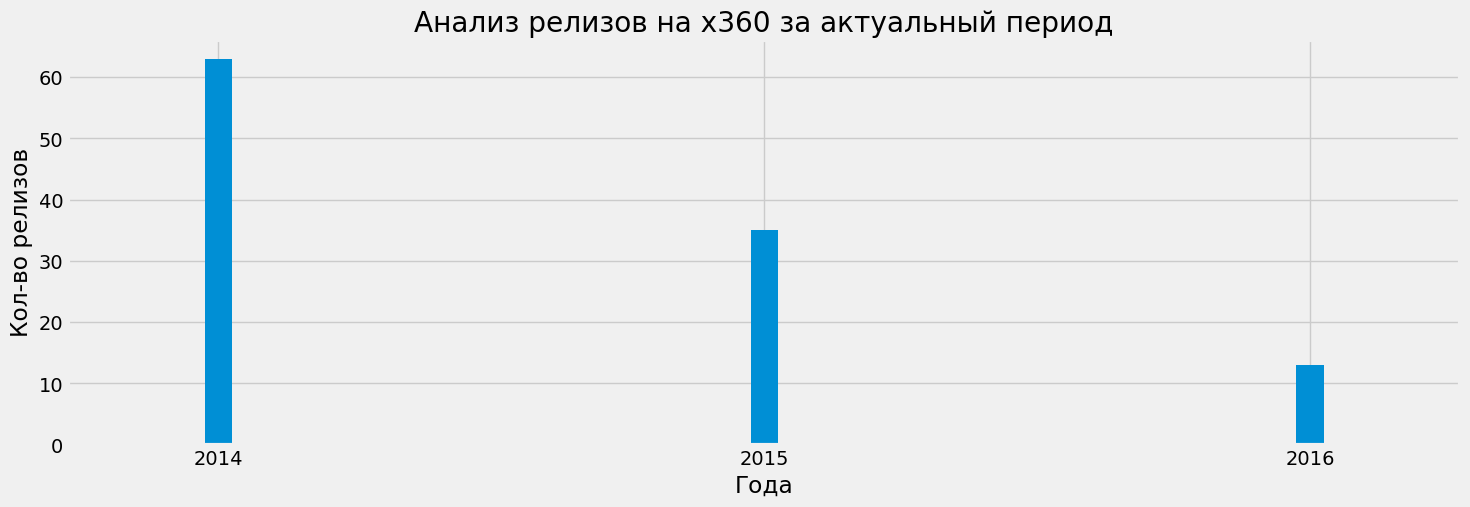

In [76]:
bar('x360_pa', 'x360')

Аналогичная с PS3 картина.На 2017 не берем в рассчет. Идем дальше.

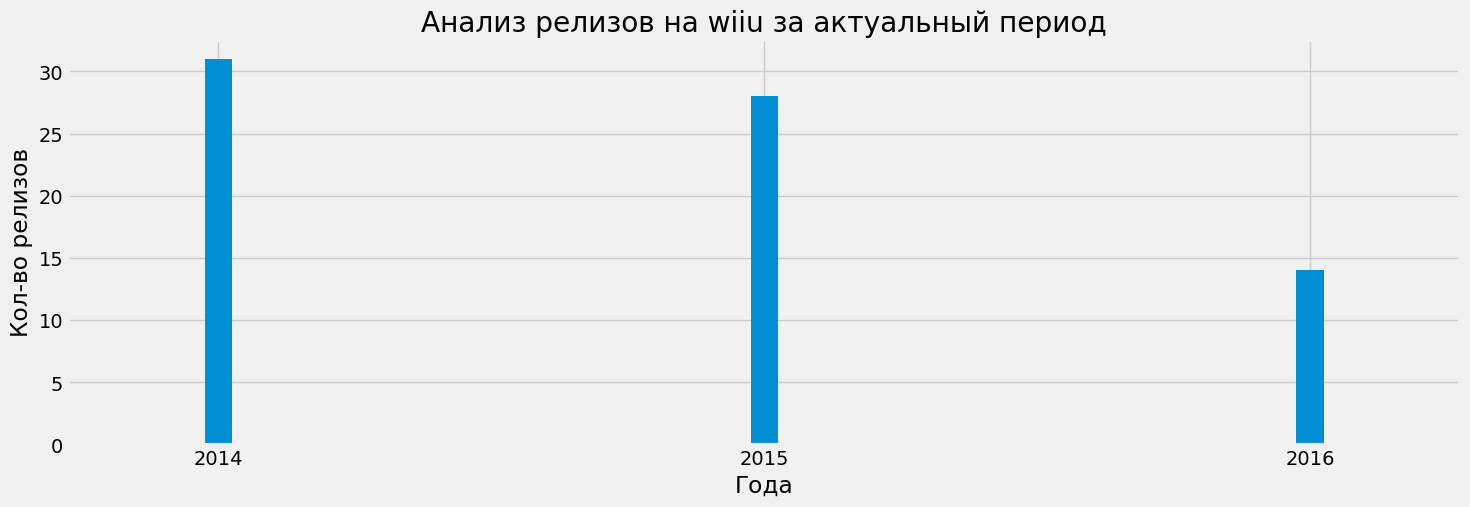

In [77]:
bar('wiiu_pa', 'wiiu')

Платформа находится в состоянии падения, и продажи на 2017 будут низкие. На нее не рассчитываем

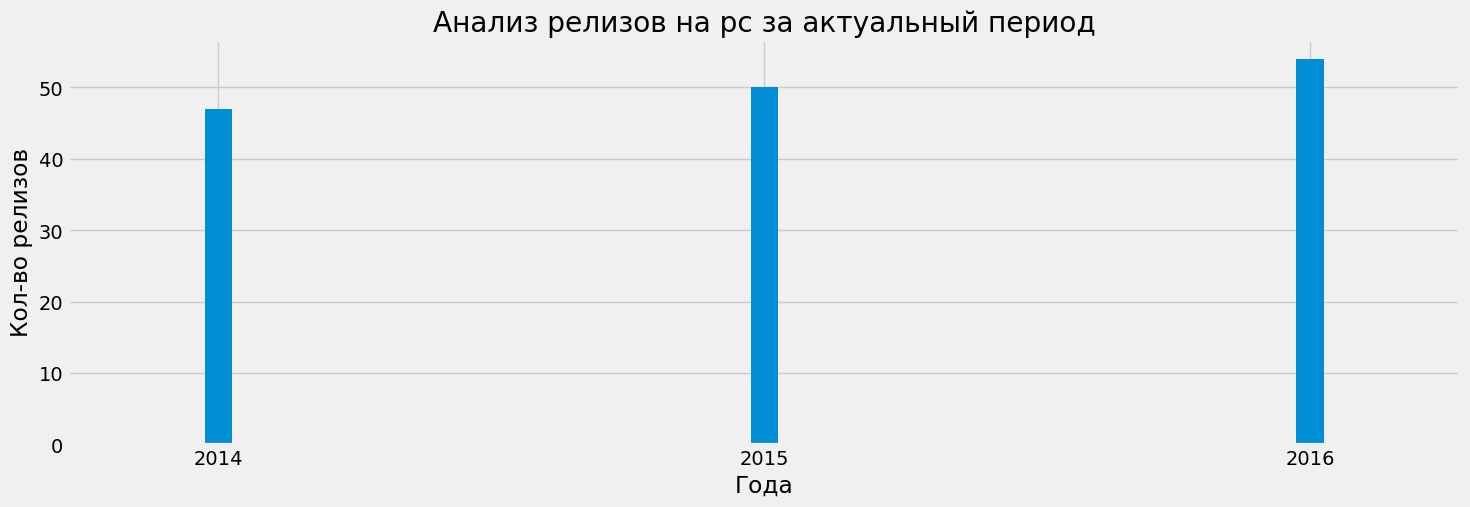

In [78]:
bar('pc_pa', 'pc')

Видим, что игры на PC уже прошли первый свой пик, но несмотря на это, в последние годы наблюдается тенденция к росту. 

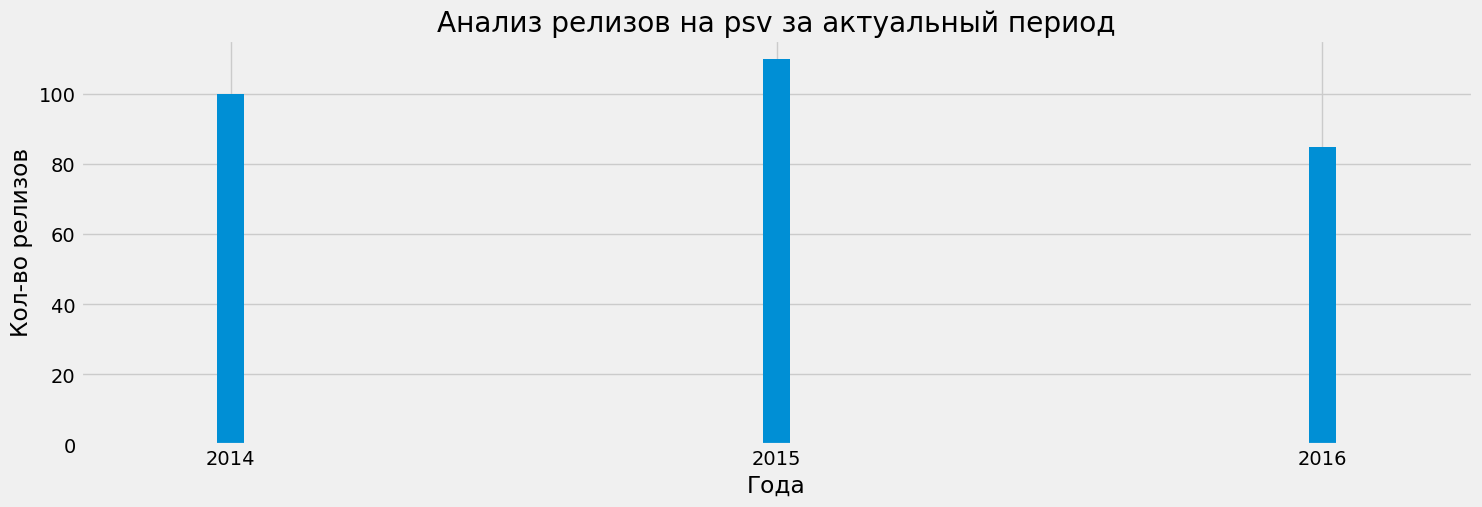

In [79]:
bar('psv_pa', 'psv')

PSV - первый релиз в 2011 году. Пик был в 2015 и сейчас наблюдаем тенденцию к спаду. В 2017 году падение будет еще больше

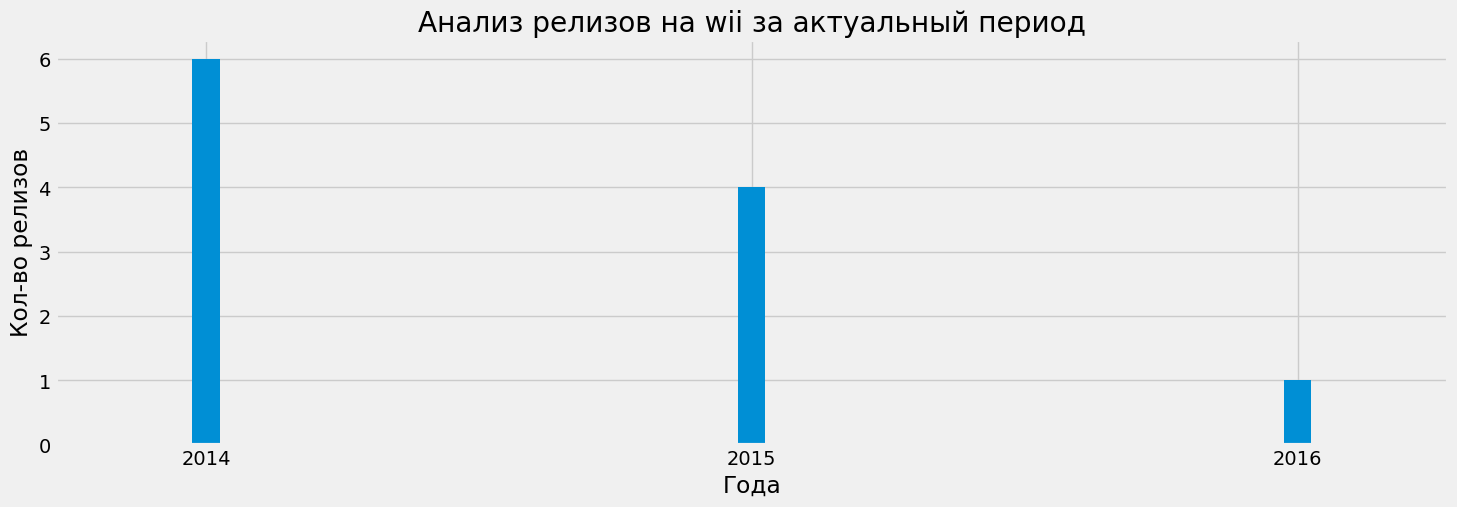

In [80]:
bar('wii_pa', 'wii')

Так же находится в стадии угасания.

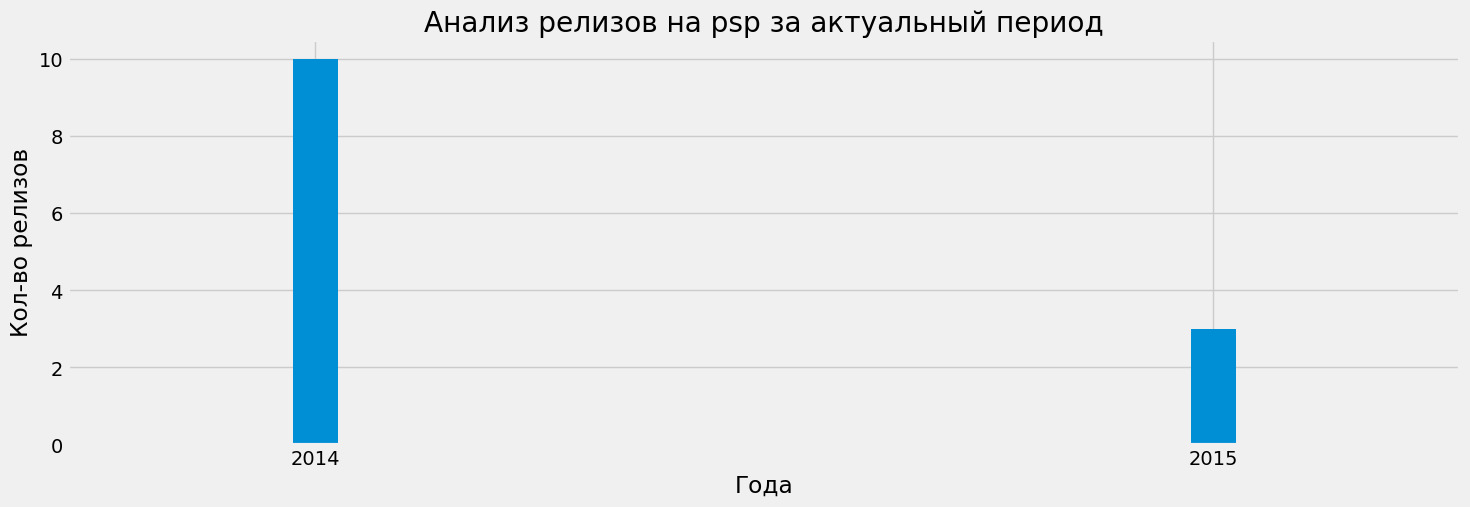

In [81]:
bar('psp_pa', 'psp')

Три последние платформы появились на рынке давно и уже прошли свои пики. Сейчас находятся в стадии угасания. На них рассчитывать не стоит

По результатам анализа видим, что на данный момент лидируют по продажам платформы PS4, XOne, 3DS, PS3, X360, но при этом две последние находятся в этом топ-3 так как уже давно находятся на рынке и сейчас у них спад. 

Таким образом на 2017 год топ платформ выглядит следующим образом:

1 место - PS4 - тут бесспорно. Платформа молодая, еще развивается, пик еще не был достигнут и как раз должен прийтись на 2017 год. Планируется около 180 млн.копий;\
2 место - XOne - продажи на этой платформе примерно в 2 раза ниже чем на PS4, но при этом она все еще находится в состоянии роста и предполагаемый объем продаж на 2017 - 90 млн.копий;\
3 место - PSV - пик уже был, но продажи остаются на высоком уровне.В 2017 планируется в районе 70 - 60 млн. копий.\
4 место - 3DS - платформа находится в состоянии спада, но при этом продажи остаются все еще достаточно высокими.\
5 место - PC - один пик уже был, после него спад и снова наблюдается рост. Уровень продаж достаточно высокий.\


Видим, что PS4 - явный лидер по количеству продаж. Продажи XOne в два раза ниже. 

(0.0, 0.8)

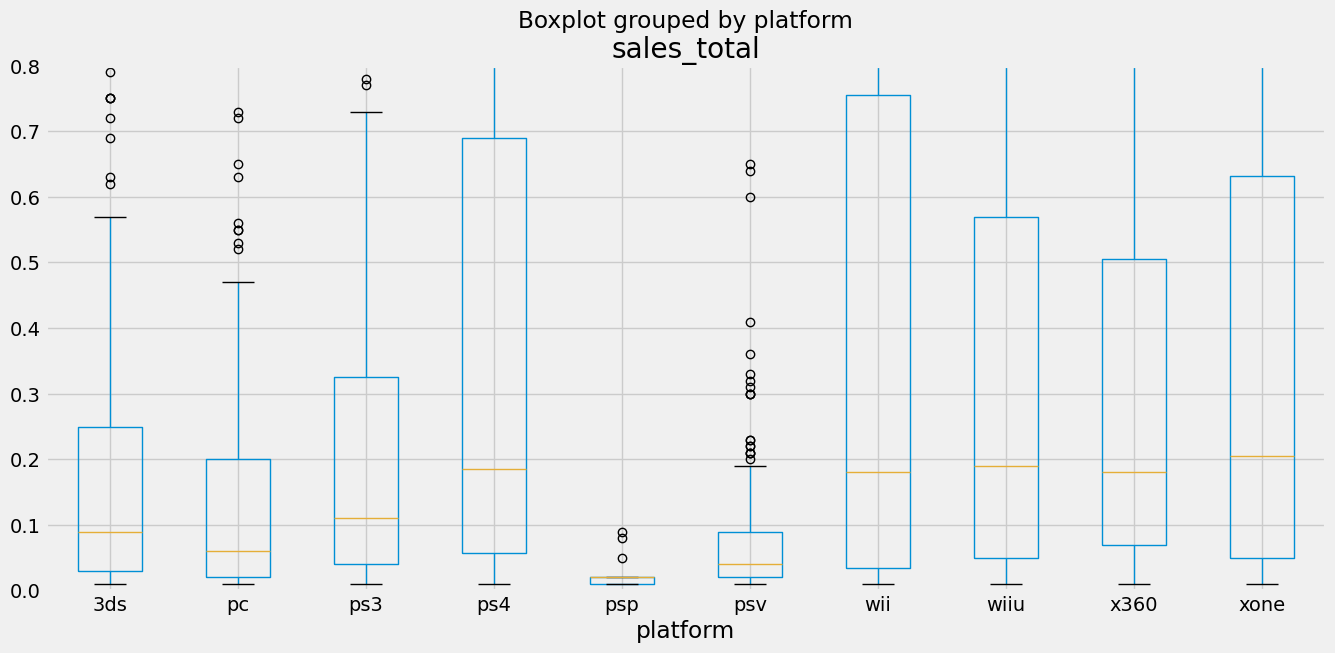

In [82]:
pa.boxplot(column='sales_total', by='platform', figsize=(16, 7))
plt.ylim(0,0.8)

#### Посмотрим как влияют оценки критиков и пользователей на продажи

In [83]:
ps4_critic = pa.query('platform == "ps4" & critic_score !=0')
ps4_user = pa.query('platform == "ps4" & user_score !=0')

In [84]:
def cr(p): #Фунция для построения диаграммы рассеяния между оценкой критиков и продажами
    p.plot(x='critic_score',
         xlabel='Оценка критиков',
         y='sales_total',
         ylabel='Число продаж',
         kind='scatter', 
         alpha=0.7, 
         title='Зависимость продаж от оценки критиков',
         figsize=(16,5));

In [85]:
def us(p): #Фунция для построения диаграммы рассеяния между оценкой пользователей и продажами
    p.plot(x='user_score',
         xlabel='Оценка пользователей',
         y='sales_total',
         ylabel='Число продаж',
         kind='scatter', 
         alpha=0.7, 
         title='Зависимость продаж от оценки пользователей',
         figsize=(16,5));

#### PS4

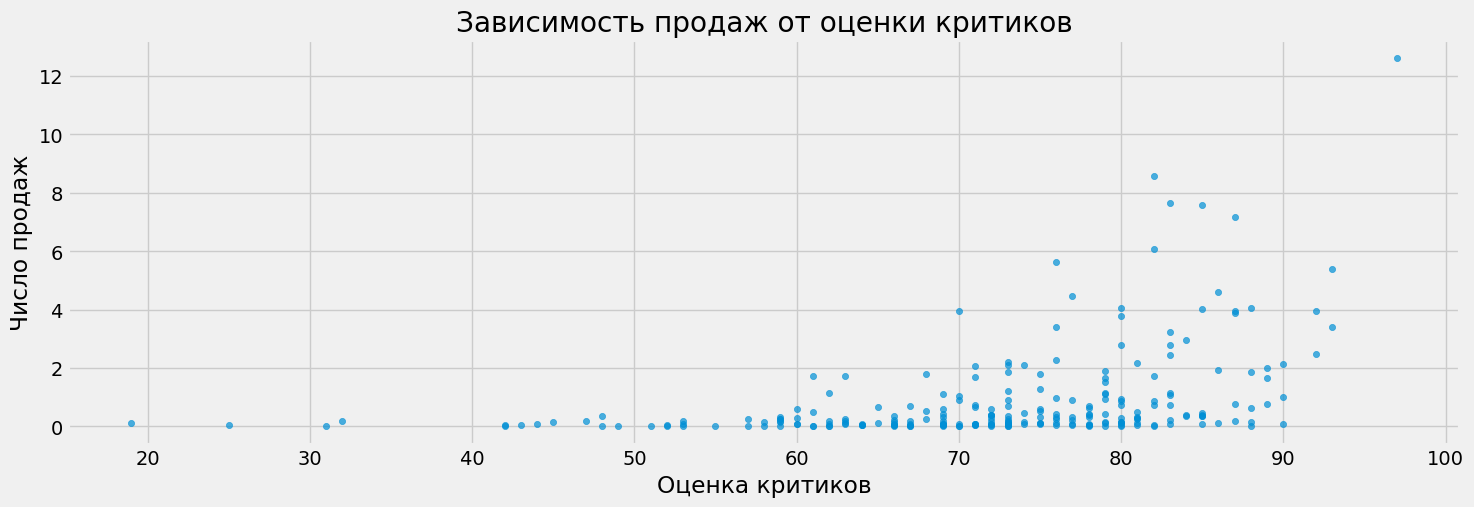

In [86]:
cr(ps4_critic)

Вполне ожидаемо, что с ростом оценки критиков, растет и кол-во продаж игр. При этом с оценки > 80 начинается достаточно большоей разброс

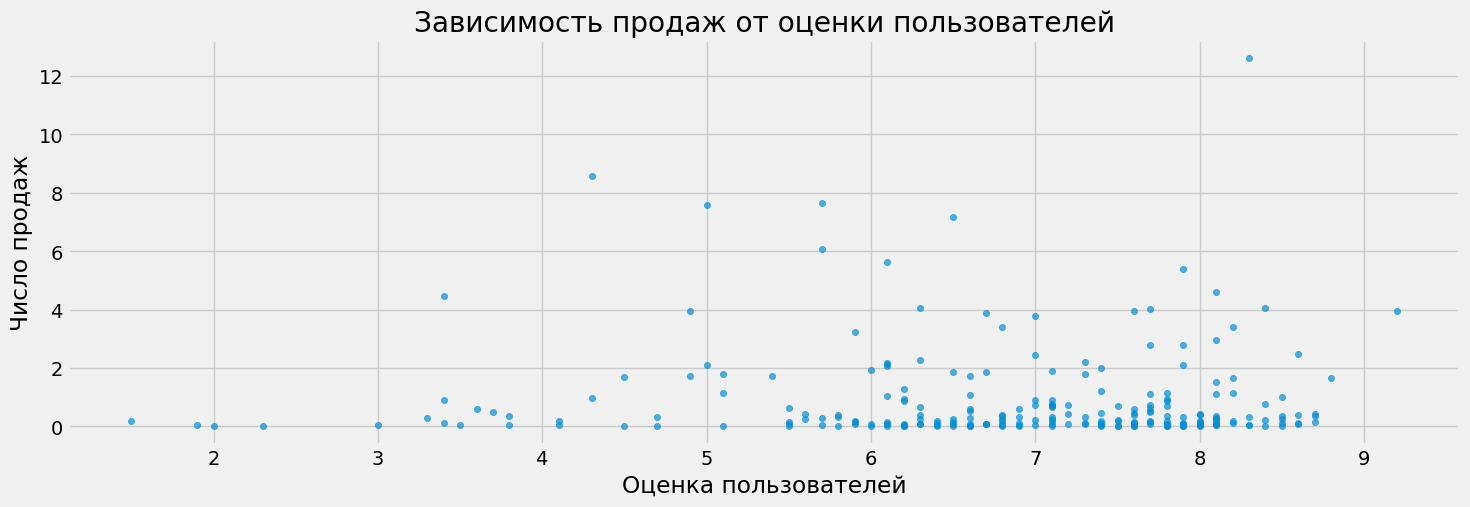

In [87]:
us(ps4_user)

На оценку пользователей ориентируются меньше нежели на оценку критиков. Видим, что разброс достаточно сильный, наяиная с оценки 4 и суммарно много продаж с оценками 4-6. Явный выброс наблюдаем на оценке 8,3 примерно.

Проверим это утверждение с помощью подсчета корреляции

In [88]:
def cor_cr(pl): #функция для подсчета корреляции медлу оценкой критиков и продажами
    correlation = pl['sales_total'].corr(pl['critic_score'], method='pearson', min_periods=1)
    pears = f'Корреляция между sales_total и critic_score составляет: {correlation:0.2}'
    if (correlation >= 0.750) & (correlation <= 1):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - очень высокая положительная коррелляция')
    elif (correlation >= 0.500) & (correlation <= 0.740):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - высокая положительная коррелляция')
    elif (correlation >= 0.250) & (correlation <= 0.490):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - средняя положительная коррелляция')
    elif (correlation >= 0.000) & (correlation <= 0.240):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - слабая положительная коррелляция')
    elif (correlation <= 0.00) & (correlation >= -0.24):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - слабая отрицательная коррелляция')
    elif (correlation <= -0.25) & (correlation >= -0.49):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - средняя отрицательная коррелляция')
    elif (correlation <= -0.50) & (correlation >= -0.74):
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - сильная отрицательная коррелляция')
    else:
        (correlation <= -0.75) & (correlation >= -0.1)
        print(f'Корреляция между sales_total и critic_score составляет: {correlation:0.2} - очень сильная отрицательная коррелляция')

In [89]:
def cor_us(pl): #функция для подсчета корреляции медлу оценкой пользователей и продажами
    correlation = pl['sales_total'].corr(pl['user_score'], method='pearson', min_periods=1)
    pears = f'Корреляция между sales_total и user_score составляет: {correlation:0.2}'
    if (correlation >= 0.750) & (correlation <= 1):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - очень высокая положительная коррелляция')
    elif (correlation >= 0.500) & (correlation <= 0.740):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - высокая положительная коррелляция')
    elif (correlation >= 0.250) & (correlation <= 0.490):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - средняя положительная коррелляция')
    elif (correlation >= 0.000) & (correlation <= 0.240):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - слабая положительная коррелляция')
    elif (correlation <= 0.00) & (correlation >= -0.24):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - слабая отрицательная коррелляция')
    elif (correlation <= -0.25) & (correlation >= -0.49):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - средняя отрицательная коррелляция')
    elif (correlation <= -0.50) & (correlation >= -0.74):
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - сильная отрицательная коррелляция')
    else:
        (correlation <= -0.75) & (correlation >= -0.1)
        print(f'Корреляция между sales_total и user_score составляет: {correlation:0.2} - очень сильная отрицательная коррелляция')

In [90]:
cor_cr(ps4_critic)
cor_us(ps4_user)

Корреляция между sales_total и critic_score составляет: 0.4 - средняя положительная коррелляция
Корреляция между sales_total и user_score составляет: -0.04 - слабая отрицательная коррелляция


Корреляция положительная средняя для оценки критиков и слабая отрицательная для оценок пользователей.

Посмотрим корреляцию и рассеяние по оставшимся в нашем платформам.

#### XOne

In [91]:
xone_critic = pa.query('platform == "xone" & critic_score !=0')
xone_user = pa.query('platform == "xone" & user_score !=0')

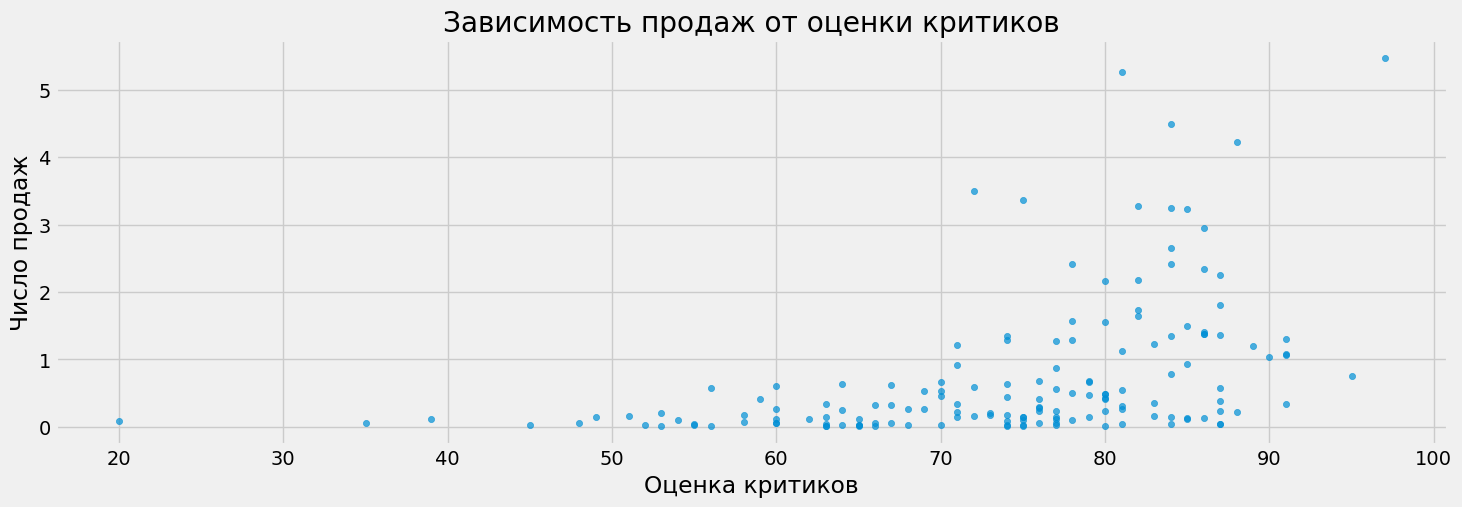

In [92]:
cr(xone_critic)

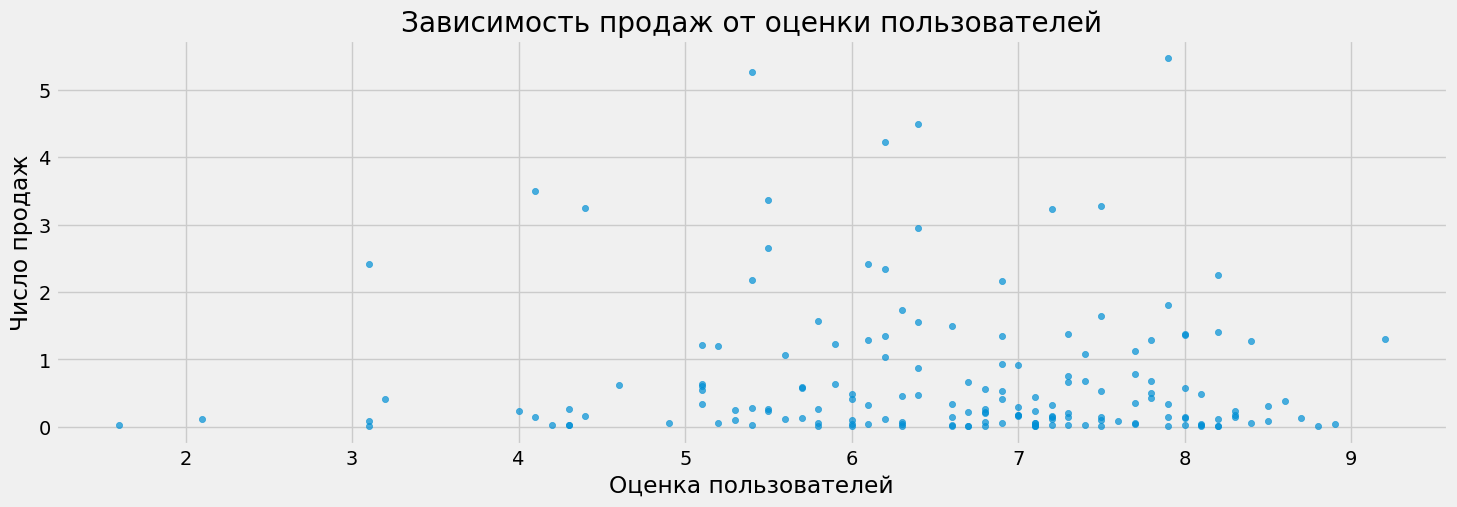

In [93]:
us(xone_user)

In [94]:
cor_cr(xone_critic)
cor_us(xone_user)

Корреляция между sales_total и critic_score составляет: 0.43 - средняя положительная коррелляция
Корреляция между sales_total и user_score составляет: -0.07 - слабая отрицательная коррелляция


Для платформы XOne корреляция между продажами и оценками критиков так же средняя положительный. Оценка пользователей так же слабая отрицательная

#### 3DS

In [95]:
ds3_critic = pa.query('platform == "3ds" & critic_score !=0')
ds3_user = pa.query('platform == "3ds" & user_score !=0')

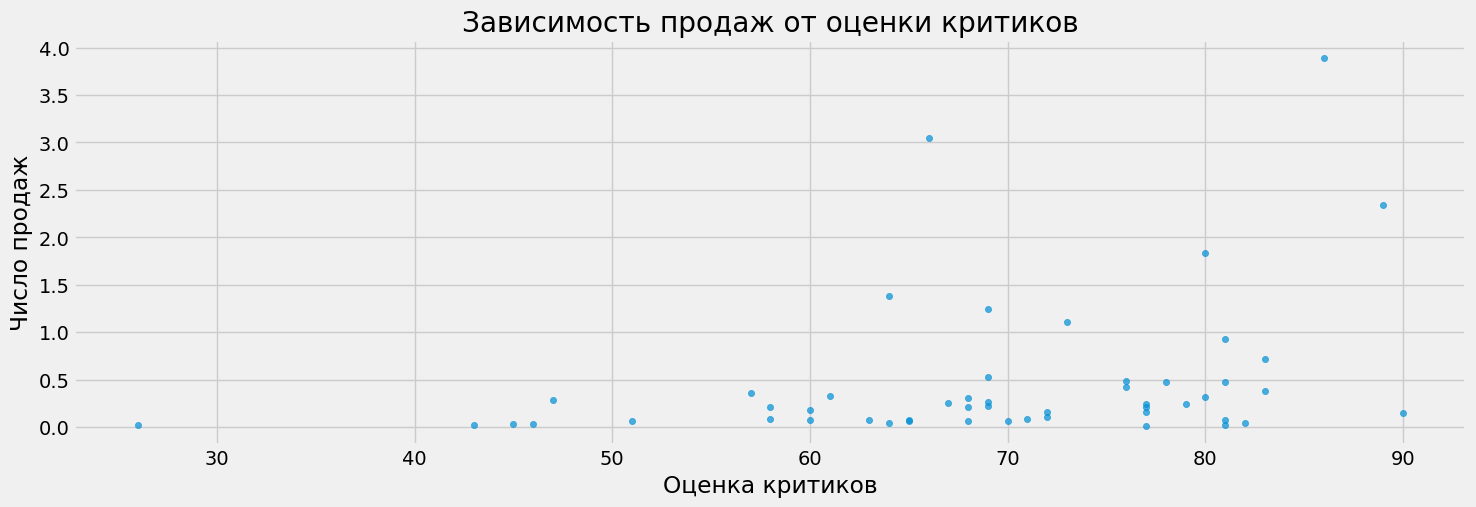

In [96]:
cr(ds3_critic)

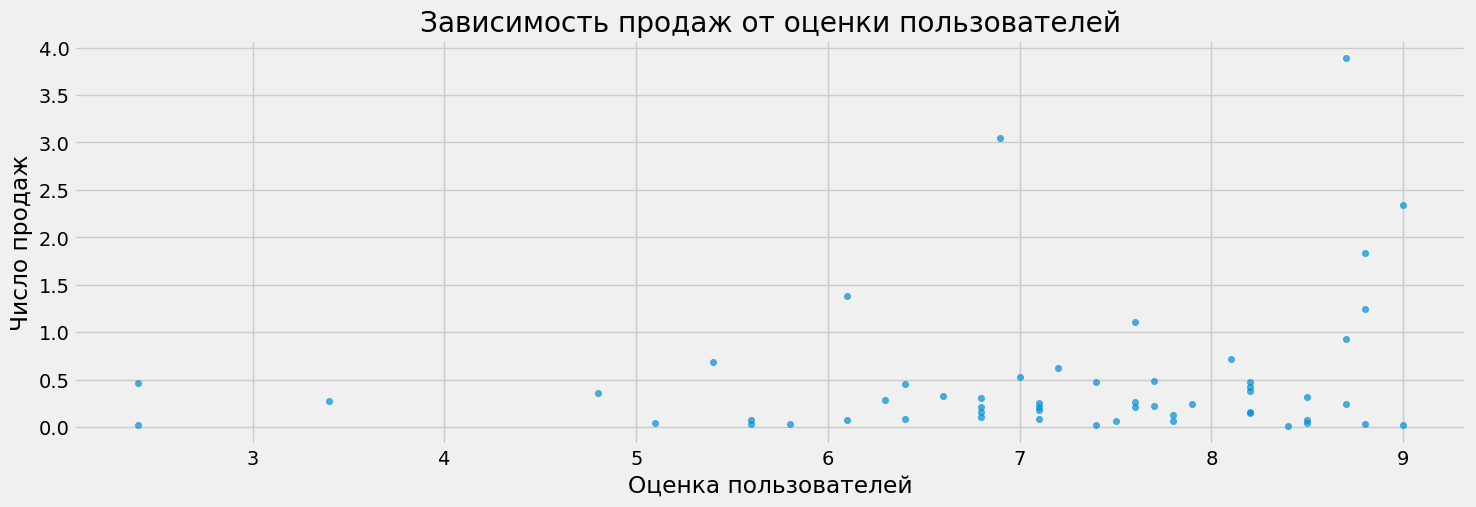

In [97]:
us(ds3_user)

In [98]:
cor_cr(ds3_critic)
cor_us(ds3_user)

Корреляция между sales_total и critic_score составляет: 0.31 - средняя положительная коррелляция
Корреляция между sales_total и user_score составляет: 0.22 - слабая положительная коррелляция


Для этой платформы влияние оценки критиков и пользователей очень близко друг к другу.

#### PS3

In [99]:
ps3_critic = pa.query('platform == "ps3" & critic_score !=0')
ps3_user = pa.query('platform == "ps3" & user_score !=0')

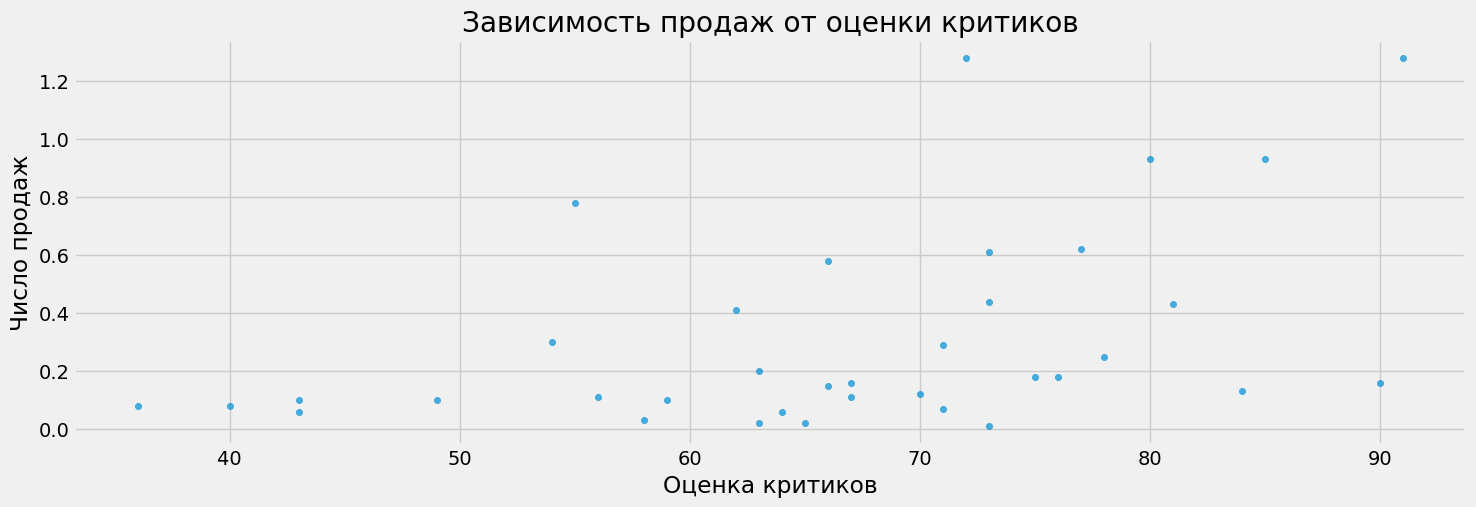

In [100]:
cr(ps3_critic)

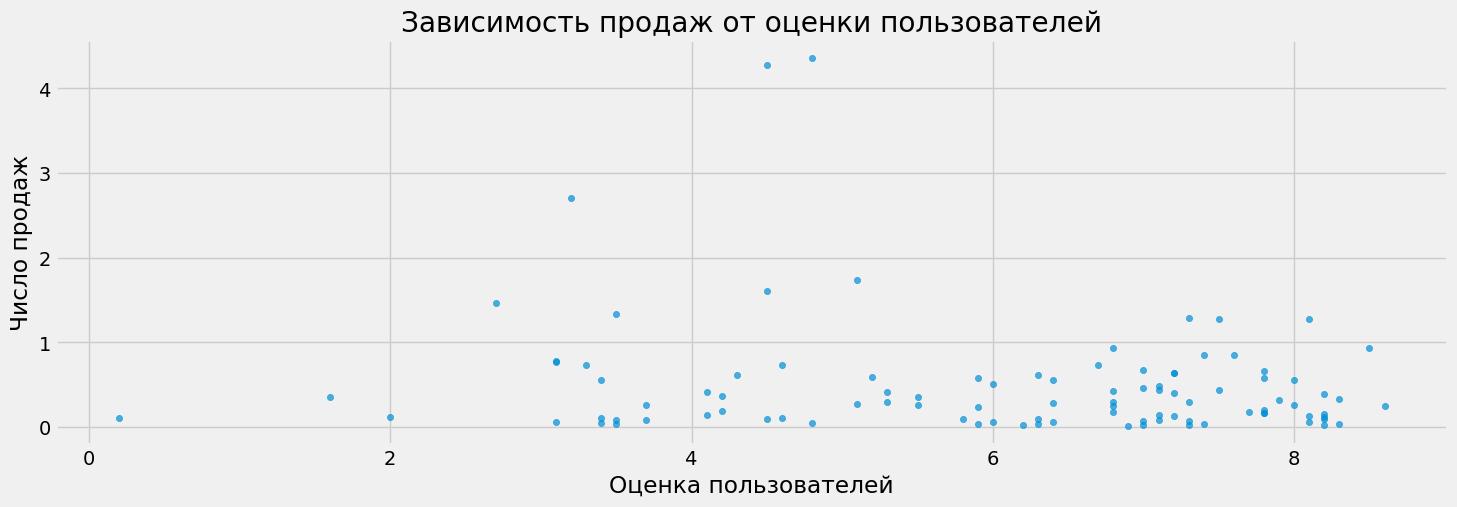

In [101]:
us(ps3_user)

In [102]:
cor_cr(ps3_critic)
cor_us(ps3_user)

Корреляция между sales_total и critic_score составляет: 0.45 - средняя положительная коррелляция
Корреляция между sales_total и user_score составляет: -0.17 - слабая отрицательная коррелляция


Аналогичная картина с первыми платформами.

#### X360

In [103]:
x360_critic = pa.query('platform == "x360" & critic_score !=0')
x360_user = pa.query('platform == "x360" & user_score !=0')

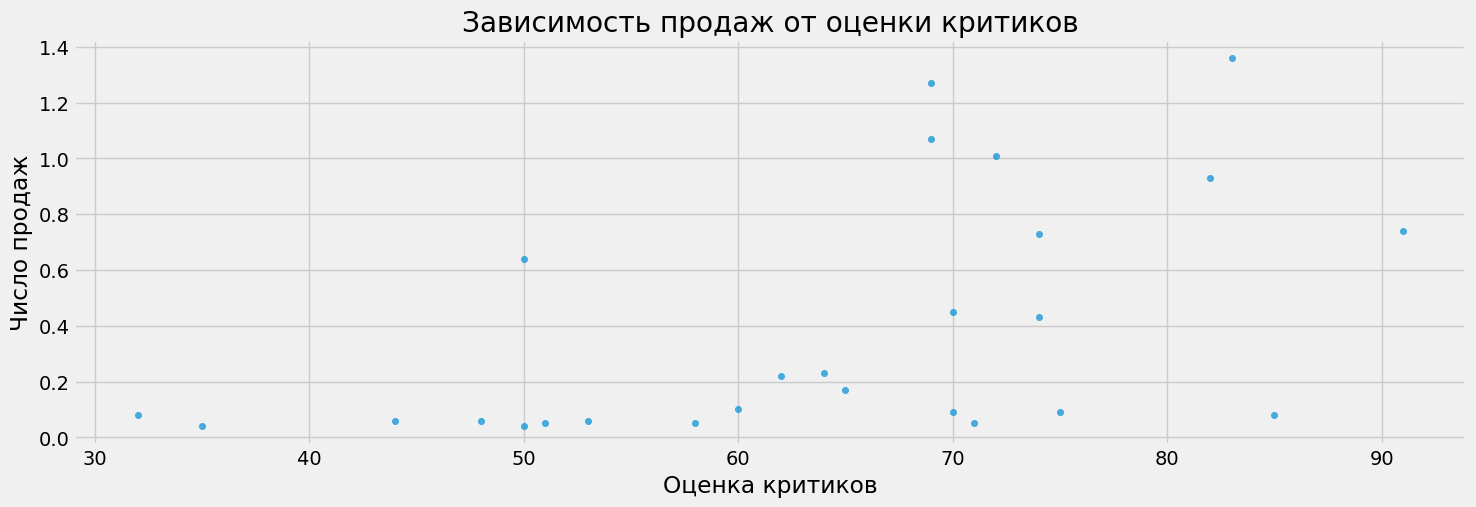

In [104]:
cr(x360_critic)

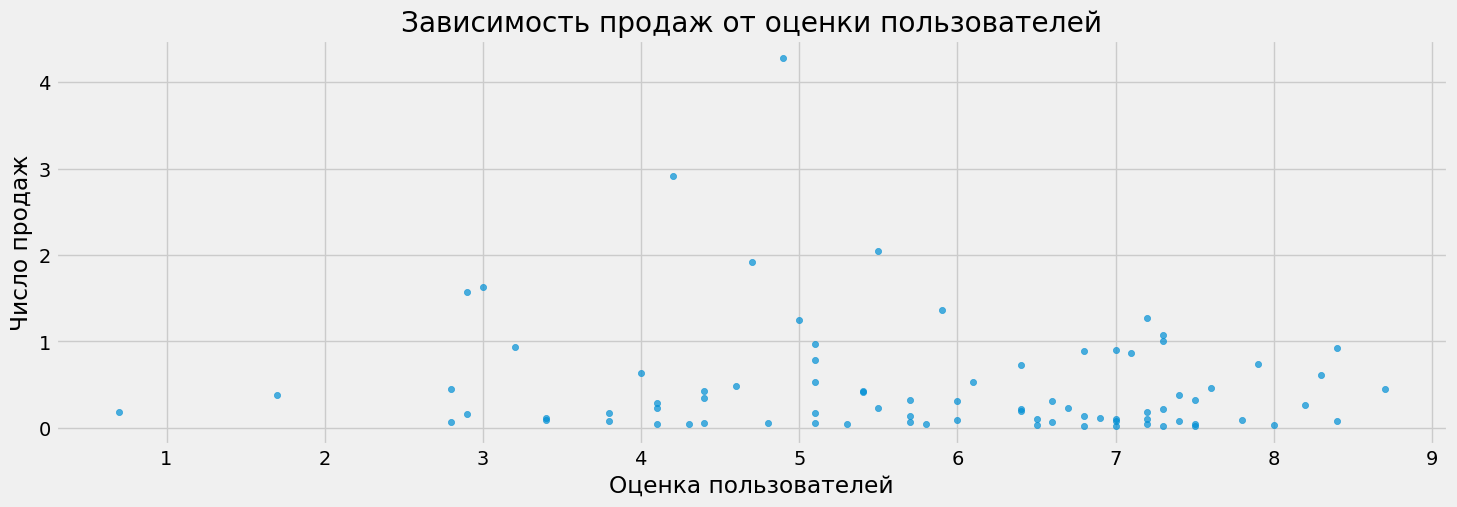

In [105]:
us(x360_user)

In [106]:
cor_cr(x360_critic)
cor_us(x360_user)

Корреляция между sales_total и critic_score составляет: 0.53 - высокая положительная коррелляция
Корреляция между sales_total и user_score составляет: -0.14 - слабая отрицательная коррелляция


А вот для XBox корреляция с оценкой критиков высокая. 

####  Посмотрим распределение игр по жанрам

In [107]:
pa_genre = pa.groupby('genre').agg({'sales_total':'sum'}).sort_values('sales_total', ascending=False).head(10)

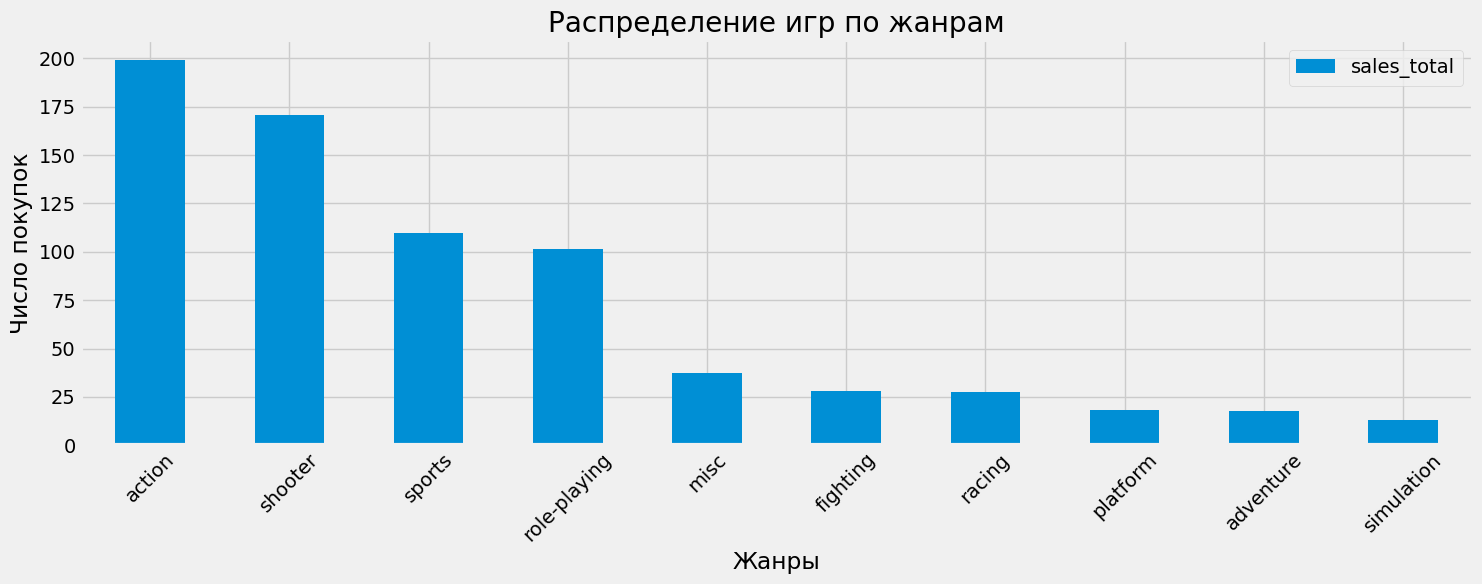

In [108]:
pa_genre.plot(kind='bar', 
              title ='Распределение игр по жанрам',
              legend='Жанры',
              xlabel='Жанры',
              ylabel='Число покупок',
              figsize=(16,5),
              rot=45);

Если смотреть распределение продаж по жанрам, то наиболее популярным является жанр Экшн. 2 и 3 место занимают спорт и шутеры соответственно. Самое малое количество продаж наблюдается в жанре Приключения

Посмотрим прибыльность игр по жанрам.

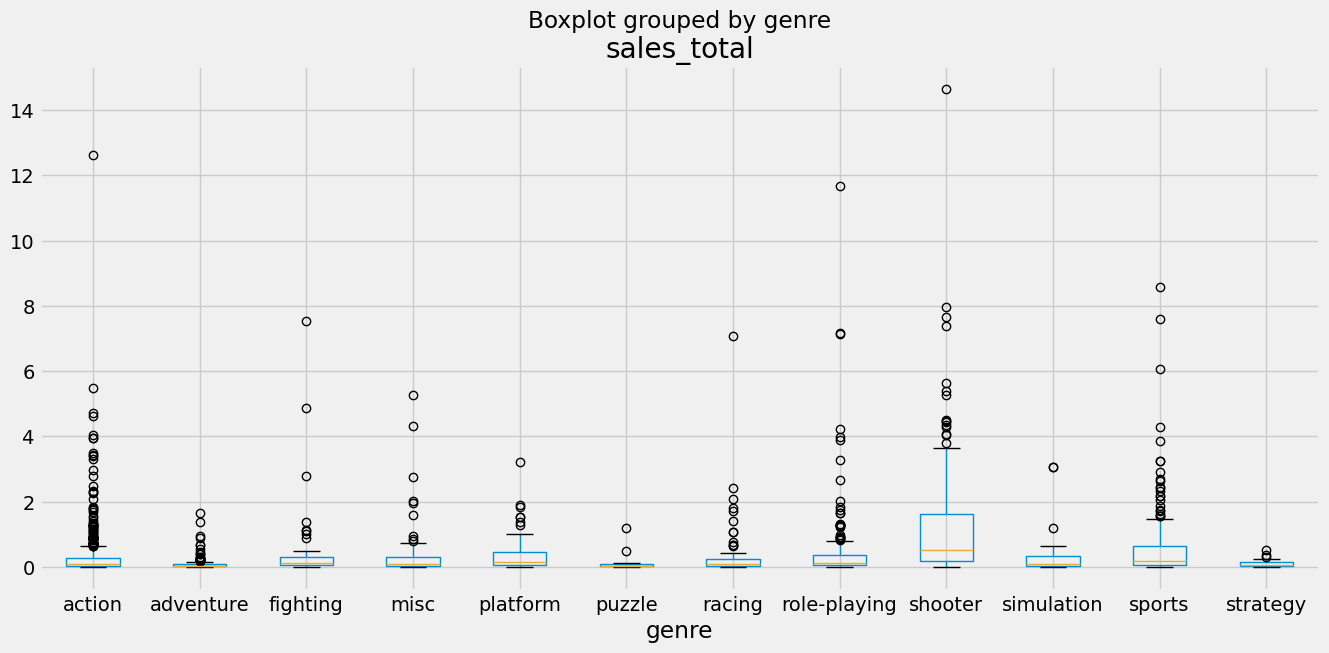

In [109]:
pa.boxplot(column='sales_total', by='genre', figsize=(16, 7));

(0.0, 1.7)

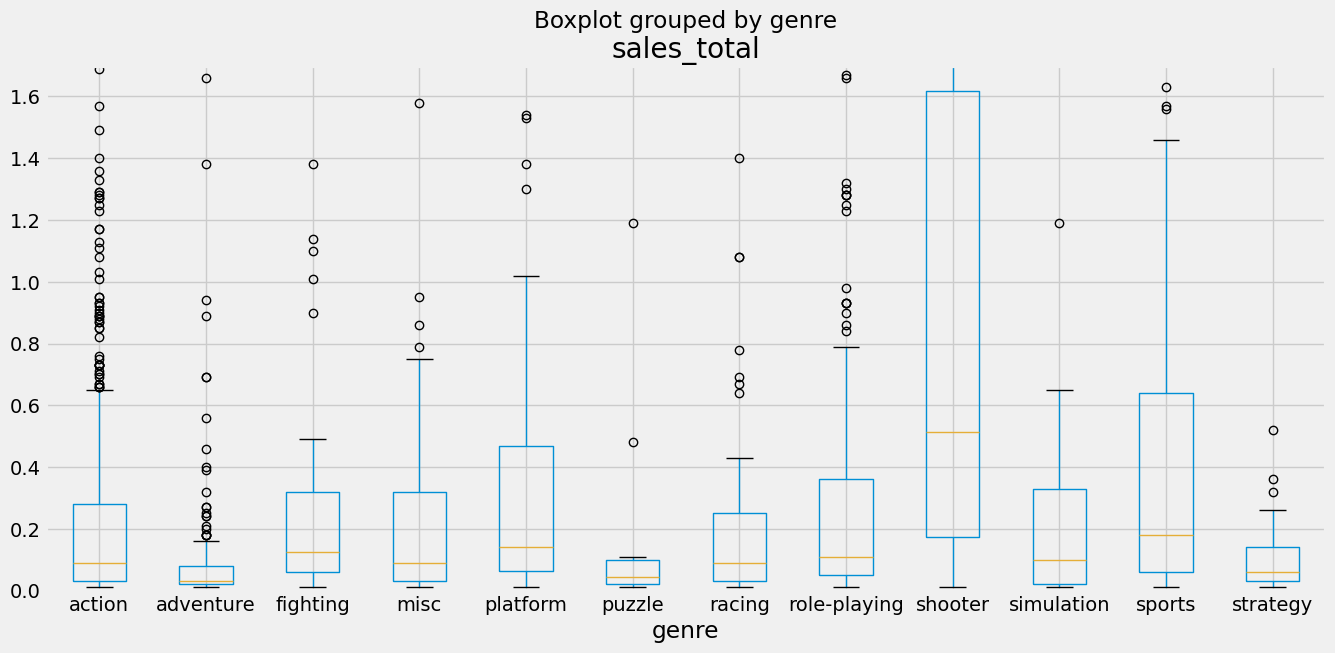

In [110]:
pa.boxplot(column='sales_total', by='genre', figsize=(16, 7));
plt.ylim(0,1.7)

Видим, что наиболее высокие продажи приходятся на жанр "Шутеры". Следом за ними идет жанр спорт.

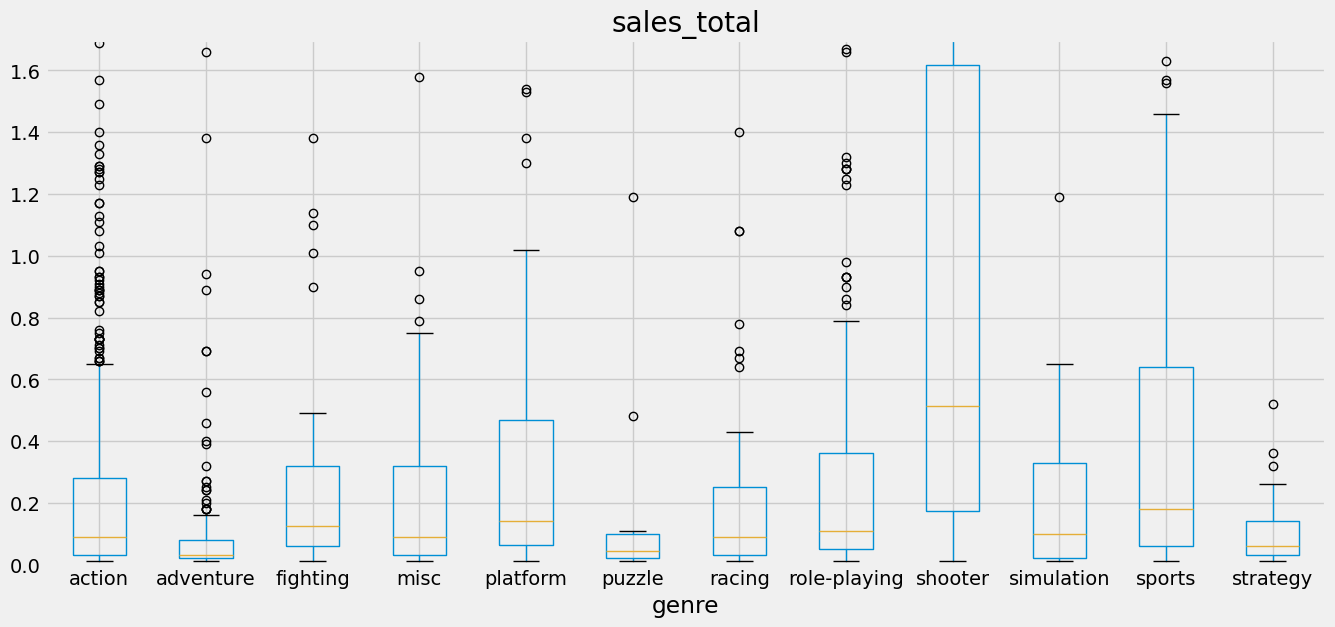

In [111]:
# check
pa.boxplot(column='sales_total', by='genre', figsize=(16, 7));
plt.suptitle('') # уберем заголовок первого уровня
plt.ylim(0,1.7);

### Вывод по разделу

В ходе исследовательского анализа данных был проведен анализ по следующим пунктам:

 - был проанализирован выход игр по годам;
 - были проанализированы платформы и определены самые популярные из них. Проведена оценка характерной цикличности появления и исчезновения    платформ. На основании этого был выделен актуальный период, который позволили бы прогнозировать поведение покупателей в 2017 году;
 - было оценено влияние оценок критиков и пользователей на продаваемость игр;
 - была проанализированна популярность игр по жанрам;
 
По итогу раздела можно сделать вывод о том, что:

 - исходя из диаграммы видим, что с 1980 по 1995 год кол-во игр достаточно малое. Основной массив данных начинается с 1995 года. В        2012-2015 годах видим падение кол-ва игр до уровня начала двухтысячных. Данных до 1991 года очень мало. Поэтому мы их убрали и в      дальнейшем анализе они не фигуррировали;
 - было выявлено, что средний срок жизни платформы 7-10 лет. При этом пик популярности приходится на 4-5 год существованияплатформы.      Новые платформы появляются примерно каждые 4-6 лет. Таким образом для возможности прогнощирования продаж на 2017 год, нам необхоим    срок в 5 лет примерно. Это и будет наш актуальный срок;
 - было выявлено, что между оценкой критиков и проадажами прослеживается положительная корреляция. Корреляция между продажами и оценками пользователей в 2 раза меньше чем с оценками критиков, что говорит о том, что на мнение пользователей люди ориентируются в меньшей степени нежели на мнение критиков.
 - было определено, что топ-3 популярных жанра: Action, sport, shooter. Наименьшее кол-во покупок в жанре Adventure
 - по прибыльности на первом месте Shooter. Следом идет Sport

### Шаг 4. Составьте портрет пользователя каждого региона

#### Определим самые популярные платформы (топ-5) для каждого региона

In [112]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  sales_total      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 171.5+ KB


In [113]:
def region(col):
    rows = 1
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(20,8))
    fig.suptitle(f'{col} по регионам', fontsize=25, fontweight='bold')

    region_list=['na_sales', 'eu_sales', 'jp_sales']
    count = 0

    for r in range(rows):
        for i in range(cols):
            pa_pivot = pa.pivot_table(index=[col], values=[region_list[count]], aggfunc=('sum'))\
            .sort_values(by=(region_list[count]), ascending=False).head()
        
            title_dict = {'na_sales': 'Продажи в Северной Америке',\
                          'eu_sales': 'Продажи в Европе',\
                          'jp_sales': 'Продажи в Японии'}
        
            color_dict={'na_sales': 'lightblue', 'eu_sales': 'lightgray', 'jp_sales': 'lightgreen'}

            plot = pa_pivot.plot(kind='bar', ec='black',ax=axes[i],fontsize=13, color=color_dict[region_list[count]], rot=50)
            axes[i].set_title(title_dict[region_list[count]], fontsize=16, fontweight='bold')
        
            count+=1

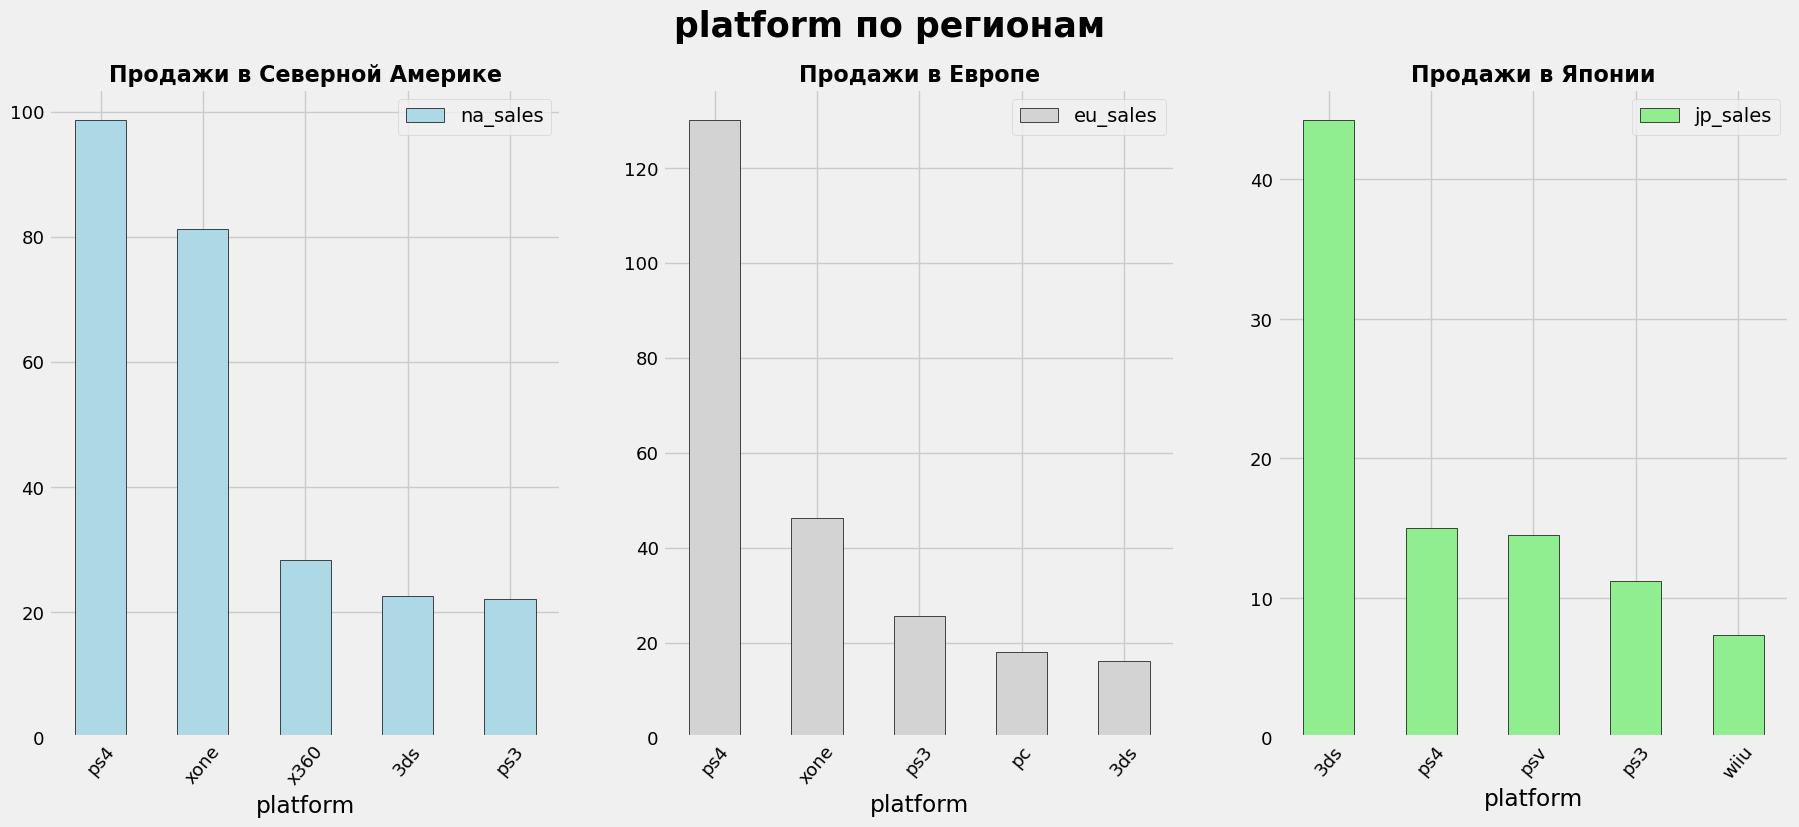

In [114]:
region('platform')

- Топ-5 платформ в северной Америке. Видим,что там наиболее популярной является PS4. Это японская платформа. На втором и третьем местах находятся американские XOne и X360.

    
- Топ-5 платформ в Европе. На первом месте японские PS4. На втором американская XOne и затем PS3. В целом картинка очень похожа с Северной Америкой


- Топ-5 платформ в Японии. Видим, что а Японии пользуются популярностью исключительно японские платфомы.

#### Определим самые популярные жанры по регионам

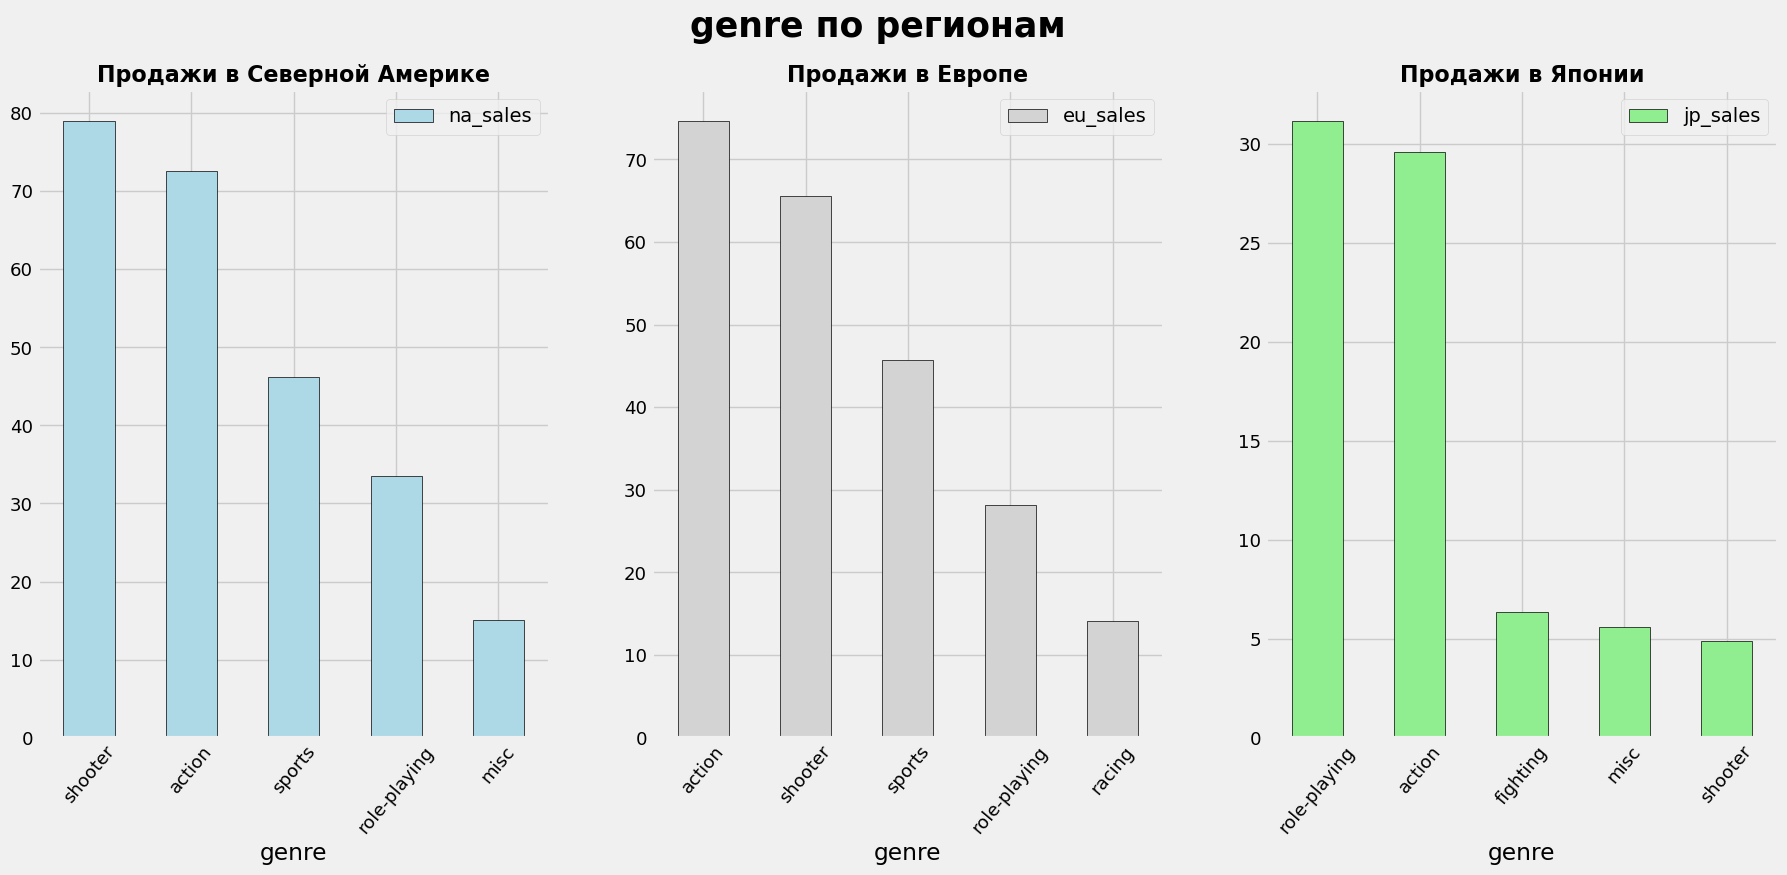

In [115]:
region('genre')

- В Северной Америке самый прибыльный жанр - шутеры. И в целом картина почти повторяет общее распределение по прибыльности жанров.  На втором месте находятся экшн, а спорт почти в два раза меньше. На 4 и 5 местах - RPG и Разное


- В Европе картина отличается и на первое место выходит жанр Экшн. На втором шутеры и на третьем спорт. На 4 месте так же RPG, но на 5 месте - гонки.


- В Японии картина достаточно сильно отличается. На первое место выходят RPG, экшн на втором и на третьем fighting. На 4 и 5 местах новые жанры - misc и shooter.

In [116]:
# check
# import pandas as pd
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])
display(df_app)

df_other = df_app[3:]
df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)
df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


In [117]:
def reg(name):
    pa_pivot = pa.pivot_table(index='platform', values=[name], aggfunc=('sum'))\
    .sort_values(by=name, ascending=False)

    pa_other = pa_pivot[:5]
    pa_other.reset_index(inplace=True)
    pa_other = pa_other.append({'platform':'Other',\
                                name: pa_pivot[name].sum()-pa_pivot[name][:5].sum()},\
                                ignore_index=True)
    return pa_other

Топ-5 и Прочие платформы для Северной Америки

In [118]:
reg('na_sales')

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05
5,Other,31.19


Топ-5 и прочие платформы для Европы

In [119]:
reg('eu_sales')

,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,pc,17.97
4,3ds,16.12
5,Other,34.76


Топ-5 и Прочие платформы для Японии

In [120]:
reg('jp_sales')

,platform,jp_sales
0,3ds,44.24
1,ps4,15.02
2,psv,14.54
3,ps3,11.22
4,wiiu,7.31
5,Other,0.76


#### Проверим влияние рейтинга ESRB на продажи по регионам

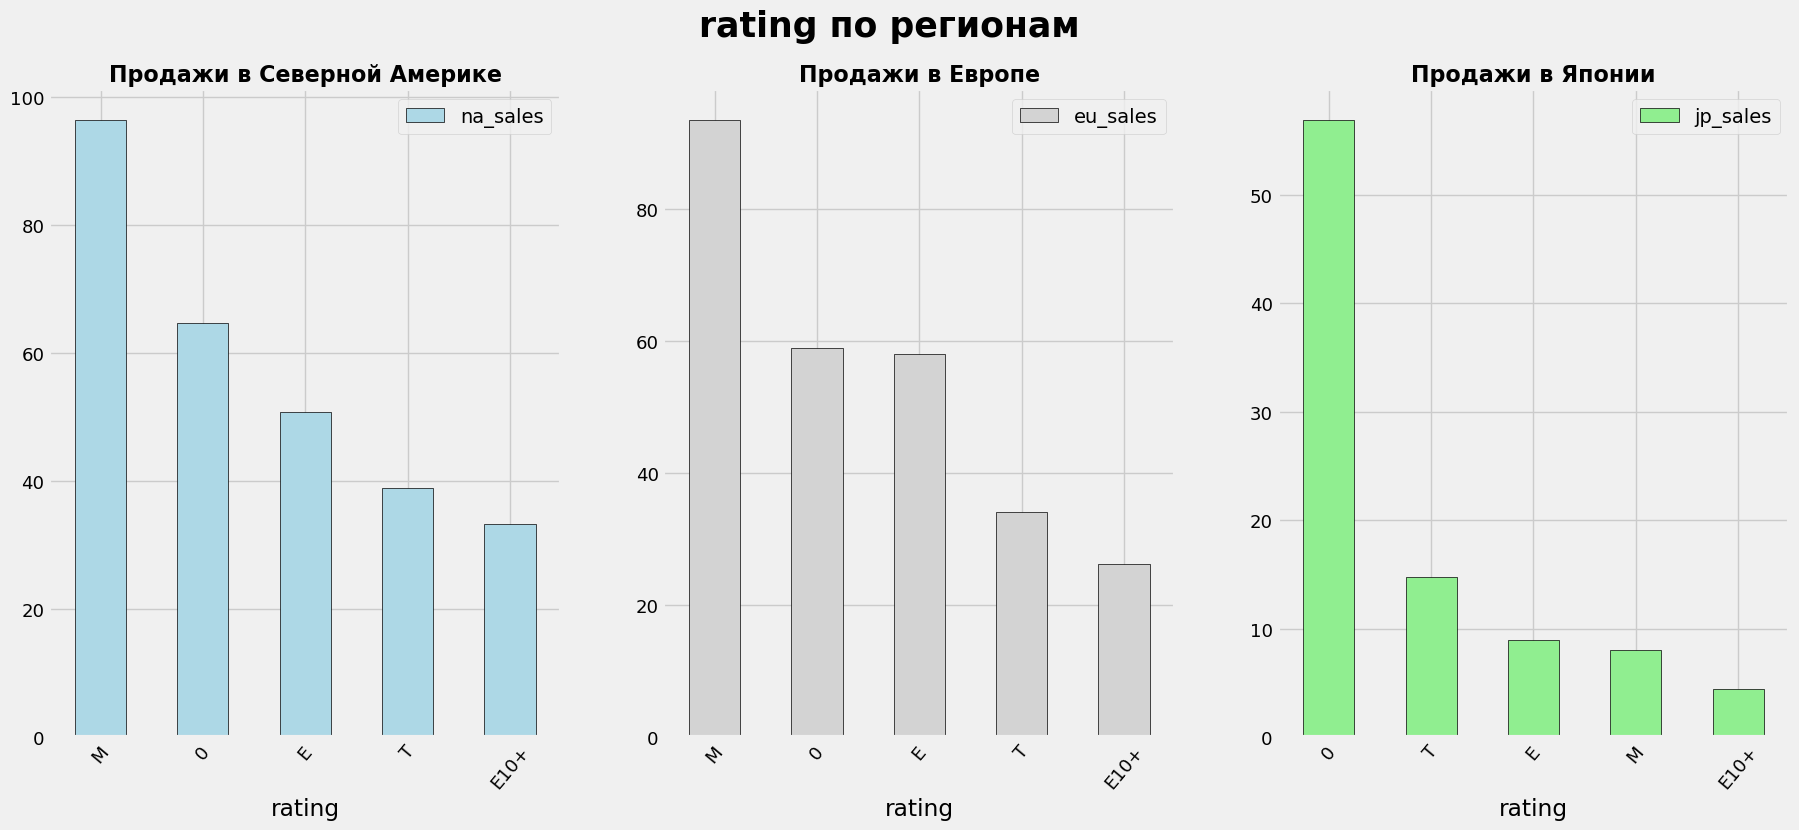

In [121]:
region('rating')

- Продажи в Северной Америке на первом месте с оценкой "Mature". На втором месте без рейтинга. Далее игры для everyone. На 4 и 5 местах с достаточно значимым отрывом идут игры для подростков и для всех от 10 лет.


- Картина продаж в Европе абсолютно идентична таковым в Северной Америке.


- И опять картина в Японии значительно отличается от продаж в Европе и Америке. Тут на первом месте стоят игры без рейтинга. Можно сделать вывод, что японцы не особо ориентируются на оценку ESRB. На втором месте с большим отрывом от первого находятся игры с оценкой T. И практически на одинаковом уровне между собой находятся игры "Everyone","Mature".

### Вывод по разделу

В ходе анализа покупок по каждому региону был составлен примерный портрет пользователей по каждому региону:
    
    Северная Америка. Преобладающее большинство пользователей тут пользуются платформой PS4, на втором месте XOne, на третьем X360. Покупают игры в жанре Shooter и с оценкой по ESRM - "M". 
    
    Европа. Преобладающее большинство пользователей на платформе PS4. Второе место XOne. Далее достаточно большой разрыв с PS3. Жанр Action и оценка ESRM - "M".
    
    Япония. Пользуются японскими платформами. На первом месте 3DS, на втором PS3. Жанр RPG и Action на втором месте. Оценка ESRM не имеет особого значения.
    
Таким образом можно сделать вывод, что наиболее популярным жанром среди всех регионов будет жарн Action. Если анализировать на какой платформе лучше их выпускать, то это будет PS4, т.к. эта платформа вторая для Северной Америки, первая для Европы и так же входит в топ-5 для Японии. При этом, если сравнивать ее с PS3 и X360, которые казалось бы более полпулярны, она находится на этапе роста популярности. В то время как первые две на этапе угасания.

### Шаг 5. Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые \

Гипотеза тут будет двусторонняя, т.к. пользовательский рейтинг может быть как больше, так и меньше


In [122]:
from scipy import stats as st
import numpy as np

pc = df.query('platform == "pc" & year_of_release >= 2013 & user_score != 0')['user_score']

xone = df.query('platform == "xone" & year_of_release >= 2013 & user_score != 0')['user_score']

alpha = 0.05

results = st.ttest_ind(pc, xone, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [123]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Вывод 1
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть
нулевую гипотезу в пользу альтернативной. С вероятностью 14% мы получили такие результаты случайно

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports равны;\
H1 - Средние пользовательские рейтинги жанров Action и Sports разные;

In [124]:
action = df.query('genre == "action" & user_score != 0')['user_score']

sports = df.query('genre == "sports" & user_score != 0')['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу и принимаем альтернативную")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.06833686503882228
Не получилось отвергнуть нулевую гипотезу


#### Вывод 2
На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть
нулевую гипотезу в пользу альтернативной. С вероятностью 6% такие результаты были получены случайно

### Общий вывод

В ходе анализа было выполнено следующее:

        - просмотрели данных;
        - предобработали их - привели данные к нужному формату, обработали пропуски там, где это было возможно;
        - добавили столбец с суммарными продажами во всех регионах;
        - проанализировали выход игр по годам;
        - проанализировали покупку игр для разных платформ;
        - оценили влияние оценок критиков и пользователей;
        - проанализировали популярность игр по жанрам;
        - составили портрет пользователя каждого региона и определили для него топ-5 платформ и жанров, а так же оценили влияние ESRB  
          на продажи в отдельном регионе;
        - проверили гипотезу, что рейтинги платформ Xbox One и PC одинаковые;
        - проверили гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ.
          «спортивные соревнования») разные;
          
По результатам исследования можно сделать следуюшие выводы:

 - исходя из диаграммы видим, что с 1980 по 1995 год кол-во игр достаточно малое. Основной массив данных начинается с 1995 года. В        2012-2015 годах видим падение кол-ва игр до уровня начала двухтысячных. Данных до 1991 года очень мало. Поэтому мы их убрали и в      дальнейшем анализе они не фигуррировали;
 - было выявлено, что средний срок жизни платформы 7-10 лет. При этом пик популярности приходится на 4-5 год существованияплатформы.      Новые платформы появляются примерно каждые 4-6 лет. Таким образом для возможности прогнощирования продаж на 2017 год, нам необхоим    срок в 5 лет примерно. Это и будет наш актуальный срок;
 - было выявлено, что между оценкой критиков и проадажами прослеживается положительная корреляция. Корреляция между продажами и оценками пользователей в 2 раза меньше чем с оценками критиков, что говорит о том, что на мнение пользователей люди ориентируются в меньшей степени нежели на мнение критиков.
 - было определено, что топ-3 популярных жанра: Action, sport, shooter. Наименьшее кол-во покупок в жанре Adventure
 - по прибыльности на первом месте Shooter. Следом идет Sport
 
В ходе анализа покупок по каждому региону был составлен примерный портрет пользователей по каждому региону:

     Северная Америка. Преобладающее большинство пользователей тут пользуются платформой PS4, на втором месте XOne, на третьем X360. Покупают игры в жанре Shooter и с оценкой по ESRM - "M". 
    
    Европа. Преобладающее большинство пользователей на платформе PS4. Второе место XOne. Далее достаточно большой разрыв с PS3. Жанр Action и оценка ESRM - "M".
    
    Япония. Пользуются японскими платформами. На первом месте 3DS, на втором PS3. Жанр RPG и Action на втором месте. Оценка ESRM не имеет особого значения.
    
Таким образом в 2017 году перспективными будет пополнение ассортимента играми на PS4 (платформа находится на этапе роста популярности) в жанрах Shooter и Action. Для увеличения продаж в Европе и Северной Америке так же нужно, чтобы были достаточно высокие отзывы критиков, а так же желательно наличие оценки ESRM = "M".

Так же в ходе исследования были проверены две гипотезы.
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.
       